# CLASE 4.1: PRIMEROS PASOS EN SCIPY
---

## Introducción.
La última sección de esta asignatura nos llevará por un viaje a una de las librerías más interesantes en Python, tanto para la ingeniería como para la ciencia en todas sus diversas ramificaciones. **Scipy** es el acrónimo de *Scientific Python*, y como su nombre lo indica, corresponde a la librería científica de Python. **Scipy** es una librería construida sobre **Numpy** que añade opciones de gran complejidad a nuestra caja de herramientas de análisis de datos en varios campos interesantes, tales como estadística, análisis de Fourier, optimización, interpolación, cálculo numérico, procesamiento de imágenes, entre otras poderosas herramientas, lo que transforma a **Scipy** en una librería al nivel de otros frameworks tales como Matlab, R-Lab u Octave.

En general, **Scipy** trabaja sobre la base varios módulos que cubren diferentes necesidades que podamos tener en relación al análisis y procesamiento de información referente a un determinado problema. Los módulos que abordaremos en nuestra asignatura, a nivel esencialmente introductorio, son los que se listan en la Tabla (1.1).

</p> <p style="text-align: center;">Tabla (1.1): Módulos que trabajaremos en nuestra asignatura</p>

| Módulo        | Descripción                                                           |
| :------------ | :-------------------------------------------------------------------- |
| `stats`       | Especializado en el análisis estadístico sobre variables aleatorias.  |
| `linalg`      | Especializado en funciones relativas al álgebra lineal                |
| `interpolate` | Especializado en métodos de interpolación                             |
| `integrate`   | Especializado en cálculo de integrales conforme varios métodos        |
| `optimize`    | Especializado en la optimización de funciones conforme varios métodos |

Dada esta estructura, es común que importemos cada módulo a utilizar. Éstos no suelen tener un alias universalmente utilizado, así que los usaremos tal cual.

Partiremos importando nuestras librerías previamente aprendidas, y seteando algunos parámetros para este notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from IPython.core.display import HTML
from mpl_toolkits import mplot3d

In [3]:
# Setting de parámetros de graficación.
sns.set()
plt.rcParams["figure.dpi"] = 150 # Resolución de nuestras figuras.
plt.style.use("seaborn-white") # Template de estilo.

/var/folders/sn/hlgjzv2n1537dplx8bvvj1c80000gn/T/ipykernel_16815/3053685251.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white") # Template de estilo.


In [4]:
# Centramos el output de los gráficos en este notebook.
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## El módulo `scipy.stats`.
En esta primera aproximación, aprenderemos algunos de los atributos del módulo `scipy.stats`, el cual nos permite la realización de poderosos análisis de naturaleza estadística. Nuestro objetivo es aprender a trabajar con distribuciones de probabilidad discretas y continuas, además de muestreos aleatorios, e incluso nos daremos el tiempo de comentar algunos aspectos relativos a pruebas de hipótesis y análisis de varianza.

### Variables aleatorias y distribuciones.
La **probabilidad**, en términos bien generales, se corresponde con el estudio de la incertidumbre. La probabilidad puede ser pensada como la fracción de tiempo en el cual un evento determinado ocurre, o como el grado de creencia bajo el cual un evento puede ocurrir. Queremos usar la probabilidad como medida de la posibilidad en que un suceso ocurre en un experimento determinado. Esta idea es esencial en campos como el aprendizaje automático (o *Machine Learning*), puesto que con frecuencia queremos entender cuánto nivel de incertidumbre hay en nuestra data o en la predicción realizada por un modelo. La cuantificación de la incertidumbre requiere de objetos matemáticos especializados conocidos como **variables aleatorias**, las cuales corresponden a funciones que mapean los resultados de experimentos aleatorios sobre los conjuntos de propiedades que nos interesan. Hay funciones asociadas a las variables aleatorias que permiten medir la probabilidad de que un resultado particular (o un conjunto de resultados) ocurra(n). Tales funciones se conocen como **distribuciones de probabilidad**, y son utilizadas como cimientos para la construcción de otros conceptos más complejos, tales como modelos probabilísticos, modelos gráficos y selección de modelos.

En la teoría de probabilidad, el conjunto de todos los posibles resultados de un proceso de naturaleza aleatoria se conoce como **espacio muestral**. A cada uno de los elementos de este espacio, que solemos denotar como $\Omega$, podemos asignarle una probabilidad de ocurrencia (por ejemplo, conforme el muestreo de los elementos de $\Omega$). El conjunto de todas estas probabilidades define a la distribución de probabilidad inherente a todos estos elementos. Una **variable aleatoria** corresponde a una función que mapea los elementos de $\Omega$ sobre el conjunto $\mathbb{R}$. Por ejemplo, los resultados posibles en el lanzamiento de un dado típico se agrupan en el conjunto $\Omega =\left\{1,2,3,4,5,6\right\}$. Por lo tanto, una variable aleatoria que describe las probabilidades de ocurrencia de cada resultado del lanzamiento de este dado puede escribirse simbólicamente como $X:\Omega \longrightarrow \mathbb{R}$. Así pues, una variable aleatoria no es más que una función (real o discreta) definida en un conjunto determinado. La palabra “aleatoria” tan solo se utiliza para recordar que el conjunto en cuestión es un espacio muestral $\Omega$ (en ningún caso significa, necesariamente, que los elementos de $\Omega$ se escojan al azar para construir la variable aleatoria respectiva).

A causa de la generalidad de la anterior definición, es posible tener distintas variables aleatorias asociadas a un mismo experimento. En cada caso particular nosotros, como experimentadores (o, a un grado ya más subjetivo, generalistas o conocedores del negocio), debemos decidir cuáles son las variables aleatorias que nos interesan. Generalmente, procuramos trabajar con las variables aleatorias cuyas funciones reflejan, con la máxima simplicidad posible, las propiedades de los resultados del experimento que son realmente esenciales. Esto no es trivial y, con frecuencia, se va haciendo más fácil con la experiencia.

El módulo `scipy.stats` nos provee de clases para representar variables aleatorias con un gran número de distribuciones de probabilidad. Disponemos fundamentalmente de dos clases que permiten la representación de variables aleatorias discretas (definidas sobre espacios muestrales finitos o infinitos numerables) y continuas (definidas sobre espacios muestrales infinitos no numerables): `rv_discrete` y `rv_continuous`, pero que no se usan de manera directa, sino que como clases padre que heredan sus atributos y métodos base sobre objetos más específicos que representan variables aleatorias con alguna distribución de probabilidad subyacente particular. En la Tabla (1.2) se resumen algunos de los métodos típicos para los objetos de **Scipy** que representan variables aleatorias.

</p> <p style="text-align: center;">Tabla (1.2): Algunos métodos aplicables sobre objetos que representan variables aleatorias en Scipy</p>

| Métodos           | Descripción                                                                        |
| :---------------- | :--------------------------------------------------------------------------------- |
| `pdf` o `pmf`     | Permite calcular la función de densidad de probabilidad $f(x)$ (caso continuo) o de masa de probabilidad $p(x)$ (caso discreto). |
| `cdf`             | Permite calcular la función de distribución de probabilidad acumulada $F(x)$.      |
| `sf`              | Permite calcular la función de supervivencia $S(x)=1-F(x)$.                        |
| `ppf`             | Permite calcular la función de cuantía $Q(x) = F^{-1}(x)$.                         |
| `moment`          | Permite calcular momentos estadísticos no centrados de orden $n$.                  |
| `stats`           | Permite calcular los estadígrafos típicos asociados a la distribución correspondiente. En general, media, varianza, entre otros |
| `fit`             | Permite ajustar una distribución a una muestra de datos por medio de un método de optimización de máxima verosimilutud (válido únicamente para distribuciones continuas). |
| `expect`          | Permite calcular el valor esperado de una función con respecto a una distribución. |
| `interval`        | Permite calcular intervalos de confianza.                                          |
| `rvs`             | Permite obtener muestreos de variables aleatorias.                                 | 
| `mean` y `median` | Permite calcular media y mediana de la distribución.                               |
| `std` y `var`     | Permite calcular desviación estándar y varianza de la distribución.                |

Consideremos pues un caso de uso para ejemplificar la construcción  de variables aleatorias en `scipy.stats`. Crearemos una variable aleatoria con distribución normal, con media 2 y desviación estándar igual a 1:

In [5]:
from scipy import stats

In [6]:
# X es una variable aleatoria normal, con media 1 y desviación estándar igual a 0.5.
X = stats.norm(loc=2, scale=1)

La función de densidad de probabilidad subyacente a una variable aleatoria creada por medio de la clase `stats.norm()` es

$$f\left( x\right)  =\displaystyle \frac{1}{\sqrt{2\pi } \sigma } \exp -\frac{1}{2} \left( \frac{x-\mu }{\sigma } \right)^{2}$$
</p> <p style="text-align: right;">$(1.1)$</p>

para $x\in \mathbb{R}$. La variable `X` es un objeto que representa, por tanto, una variable aleatoria normal con $\mu=2$ y $\sigma=1$. Por ejemplo, usando la información presentada en la Tabla (1.2), podemos calcular algunos estadígrafos asociados a `X` como sigue:

In [7]:
# Estadígrafos de esta distribución.
print(f"Media: {X.mean()}")
print(f"Mediana: {X.median()}")
print(f"Desviación estándar: {X.std()}")
print(f"Varianza: {X.var()}")

Media: 2.0
Mediana: 2.0
Desviación estándar: 1.0
Varianza: 1.0


Podemos, igualmente, calcular los momentos no centrales de orden $n$ para nuestra variable aleatoria `X` usando el método `moment()`:

In [8]:
# Primeros 7 momentos de la variable aletoria X.
moments = [X.moment(n) for n in range(1, 8)]

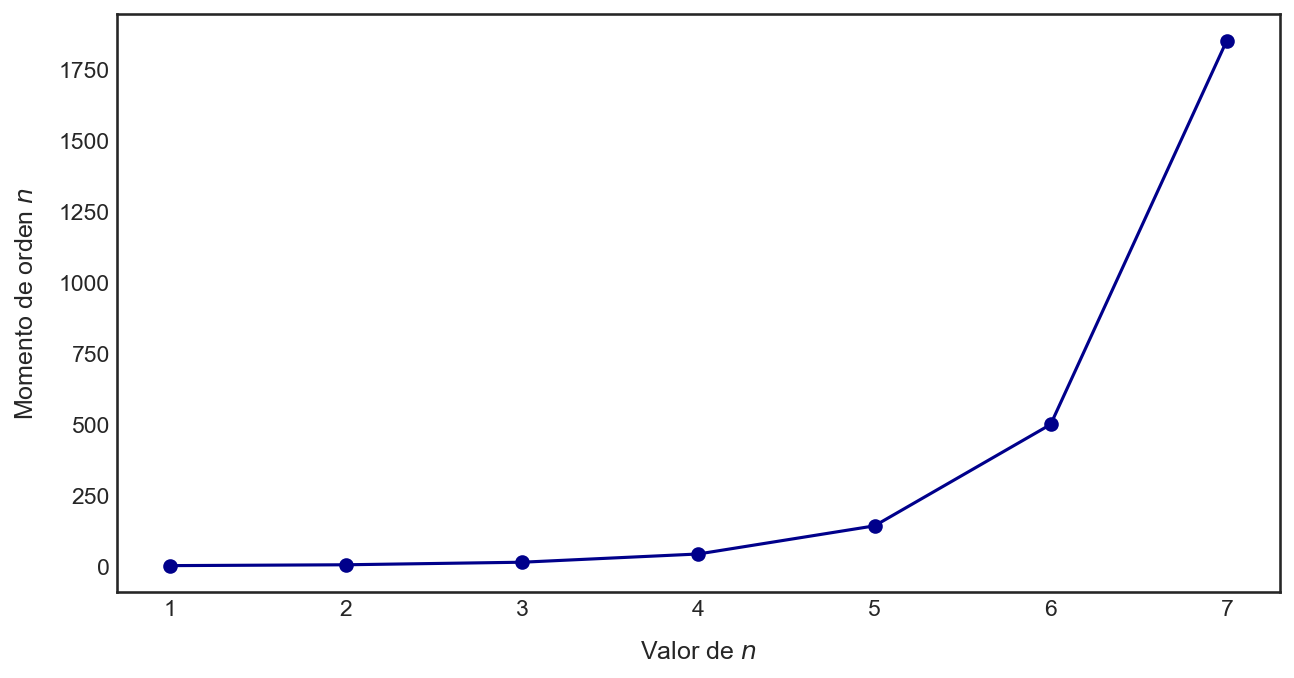

In [9]:
# Graficamos estos momentos.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(1, 8), moments, marker="o", linestyle="-", color="darkblue")
ax.set_xlabel(r"Valor de $n$", fontsize=12, labelpad=10)
ax.set_ylabel(r"Momento de orden $n$", fontsize=12, labelpad=10);

A partir de nuestro objeto `X`, podemos generar un muestreo de varias funciones asociadas a la misma. Por ejemplo, podemos usar el método `pdf()` para obtener una muestra de la función de densidad inherente a `X`, considerando sus parámetros de localización (media) y escala (desviación estándar). Lo único que necesitamos es un arreglo que liste los valores para los cuales queremos el valor de dicha función de densidad:

In [10]:
# Obtenemos los valores de la función de densidad subyacente a X en el intervalo [-6, 6].
x = np.linspace(start=-6, stop=6, num=100)
X_pdf = X.pdf(x)

In [11]:
# Muestreamos tambien usando el generador de números aleatorios de Numpy.
rng = np.random.default_rng(seed=42)
X_samp = rng.normal(loc=2, scale=1, size=1000)

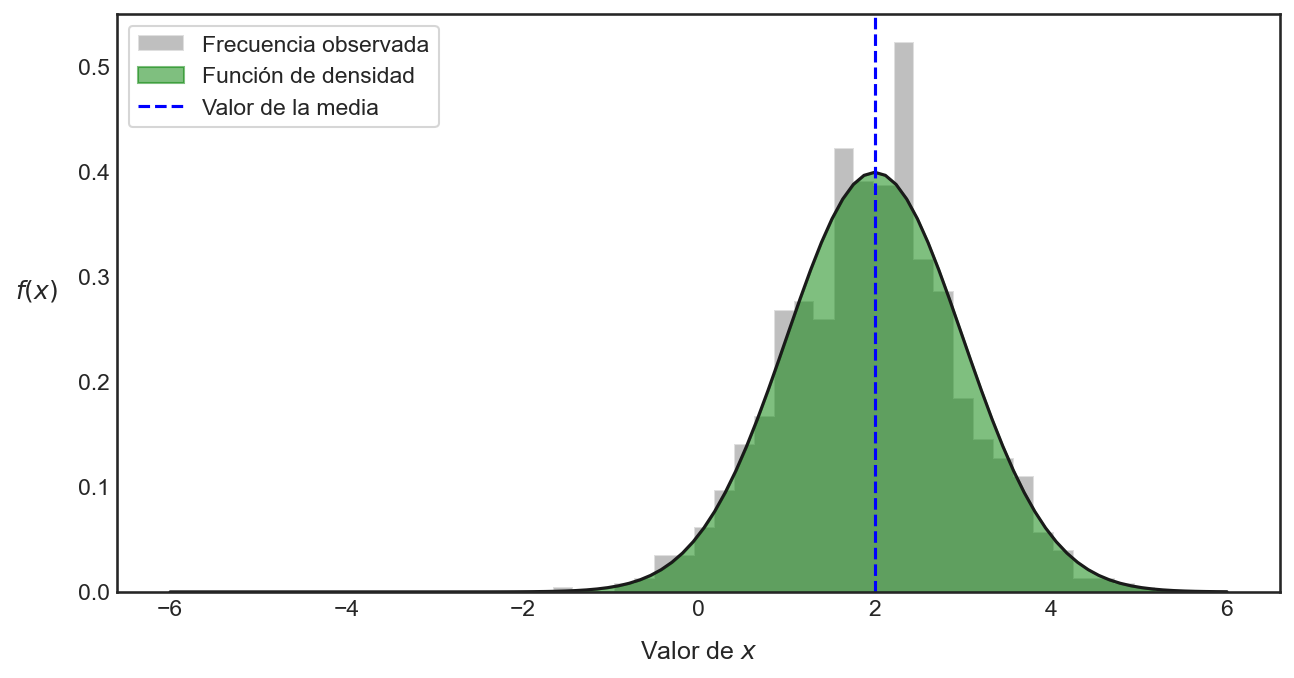

In [12]:
# Graficamos esta función de densidad y el histograma de las muestras.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, X_pdf, color="k", linestyle="-")
ax.hist(
    x=X_samp, bins=30, color="gray", histtype="stepfilled", alpha=0.5, 
    density=True, label="Frecuencia observada"
)
ax.fill_between(x=x, y1=X_pdf, color="green", alpha=0.5, label="Función de densidad")
ax.axvline(x=X.mean(), color="blue", linestyle="--", label="Valor de la media")
ax.set_xlabel(r"Valor de $x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$f(x)$", fontsize=12, labelpad=20, rotation=0)
ax.legend(loc="upper left", frameon=True);

Podemos, igualmente, obtener la función de distribución acumulada inherente a nuestra variable aleatoria `X` simplemente usando el método `cdf()`. En este caso, podemos usar el mismo arreglo de valores anterior y que usamos para la graficación de la correspondiente función de densidad:

In [13]:
# Obtenemos los valores de la función de distribución subyacente a X en el intervalo [-3, 3].
X_cdf = X.cdf(x)

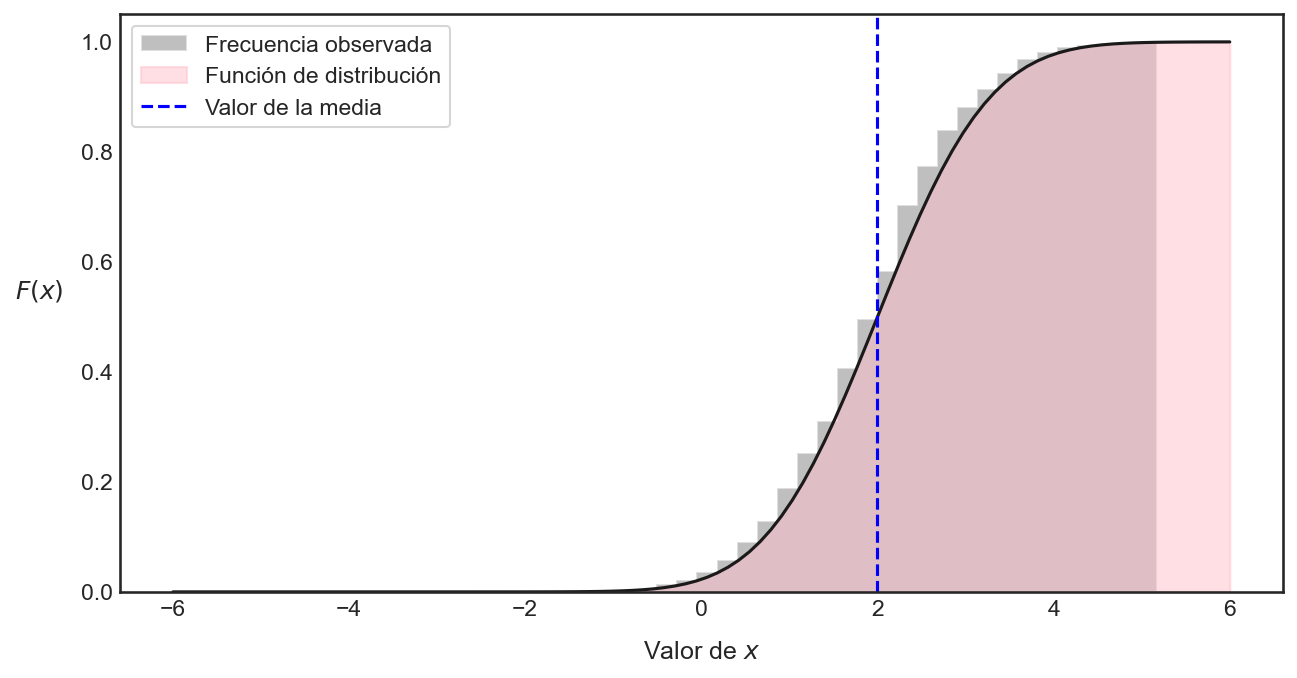

In [14]:
# Construimos el gráfico de esta función de distribución y lo comparamos con las muestras correspondientes.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, X_cdf, color="k", linestyle="-")
ax.hist(
    x=X_samp, bins=30, color="gray", histtype="stepfilled", alpha=0.5, 
    density=True, cumulative=True, label="Frecuencia observada"
)
ax.fill_between(x=x, y1=X_cdf, color="pink", alpha=0.5, label="Función de distribución")
ax.axvline(x=X.mean(), color="blue", linestyle="--", label="Valor de la media")
ax.set_xlabel(r"Valor de $x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$F(x)$", fontsize=12, labelpad=20, rotation=0)
ax.legend(loc="upper left", frameon=True);

Podemos igualmente estimar los intervalos de confianza asociados a una función de densidad inherente a una variable aleatoria mediante el método `interval()`. De esta manera, podemos determinar la región interior a una función de densidad en la cual la probabilidad de obtener un determinado resultado de la variable aleatoria tiene un valor dado. Por ejemplo, en el caso de nuestra variable aleatoria normal `X`, el intervalo de confianza que captura el 95% de los valores en el correspondiente espacio muestral se calcula como sigue:

In [15]:
# Intervalo de 95% de confianza para X.
min_95, max_95 = X.interval(0.95)

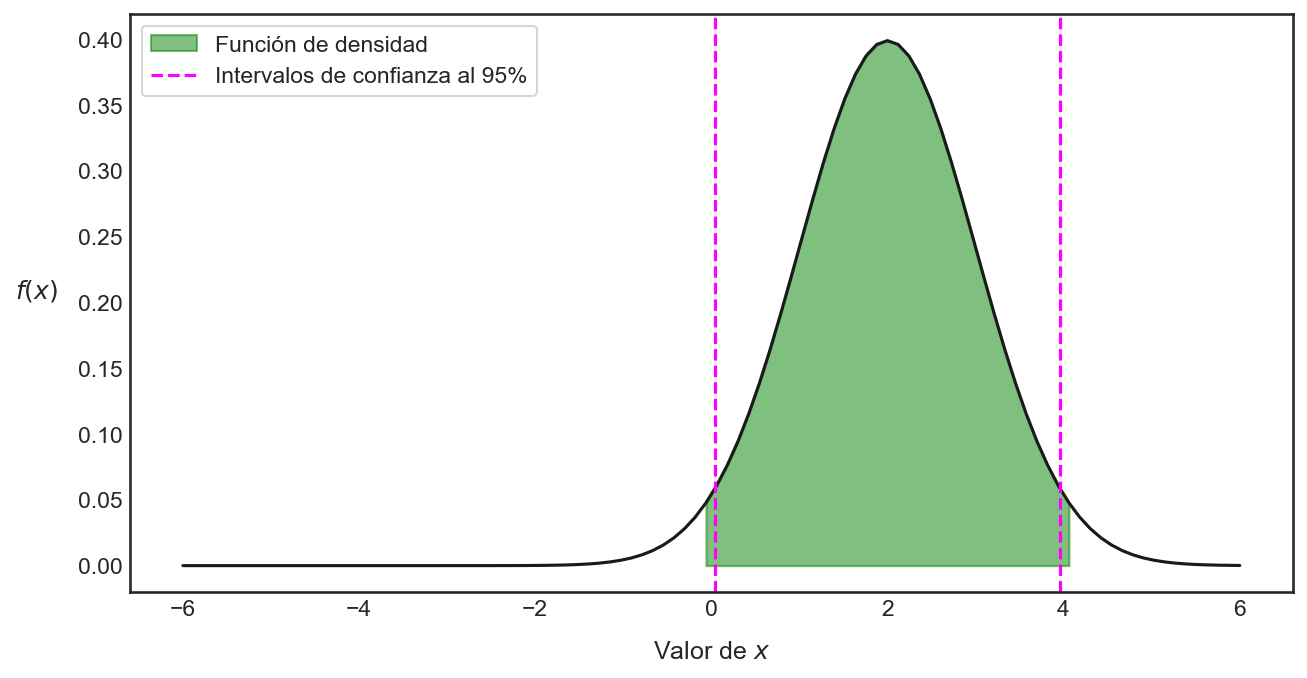

In [16]:
# Graficamos esta función de densidad con su intervalo de confianza al 95%.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, X_pdf, color="k", linestyle="-")
ax.fill_between(
    x=x, y1=X_pdf, where=(X_pdf >= min_95) & (X_pdf <= max_95), 
    color="green", alpha=0.5, label="Función de densidad"
)
ax.axvline(x=min_95, color="magenta", linestyle="--", label="Intervalos de confianza al 95%")
ax.axvline(x=max_95, color="magenta", linestyle="--")
ax.set_xlabel(r"Valor de $x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$f(x)$", fontsize=12, labelpad=20, rotation=0)
ax.legend(loc="upper left", frameon=True);

Los ejemplos anteriores incluyen todos un recurso gráfico que nos permite construir una primera intuición en relación tanto a los objetos que hemos construido usando el módulo `scipy.stats`. Siempre es buena idea tener a mano un recurso como éste al instanciar objetos que representen variables aleatorias en una primera instancia, ya que nos permite entender el significado de los parámetros que definen la geometría inherente a cualquier distribución.

**Ejemplo 1.1 - Visualización de la geometría de la distribución de Poisson:** Sea $\lambda > 0$ y $X$ una variable aleatoria discreta (es decir, $X$ toma valores solamente en el conjunto $\mathbb{N}\cup \left\{ 0\right\}$). Si la funcuón de masa de probabilidad asociada a $X$ se escribe de la forma

$$p\left( x\right)=\displaystyle \frac{\exp \left( -\lambda \right)  \lambda^{x} }{x!}$$
</p> <p style="text-align: right;">$(1.2)$</p>

entonces decimos que $X$ es una variable aleatoria de Poisson. La función de distribución resultante se denomina distribución de Poisson de parámetro $\lambda$. 

La distribución de Poisson es popular porque modela el número de veces que ocurre un evento en un intervalo de tiempo. De esta manera, a partir de una frecuencia de ocurrencia media, permite modelar la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos “raros”, razón por la cual, en minería, es una opción típica en modelos sísmicos discretos. El parámetro $\lambda > 0$ representa el número de veces que se espera que ocurra dicho suceso en un intervalo dado. Por ejemplo, si es suceso estudiado tiene lugar en promedio 4 veces por minuto, y estamos interesados en la probabilidad de que ocurra $k$ veces en un intervalo de 10 minutos, sería razonable utilizar un modelo de distribución de Poisson con $\lambda = 10\times 4= 40$.

El módulo `scipy.stats` dispone de la clase `poisson()` para la construcción de variables aleatorias de Poisson. Sólo requerimos el parámetro $\lambda$:

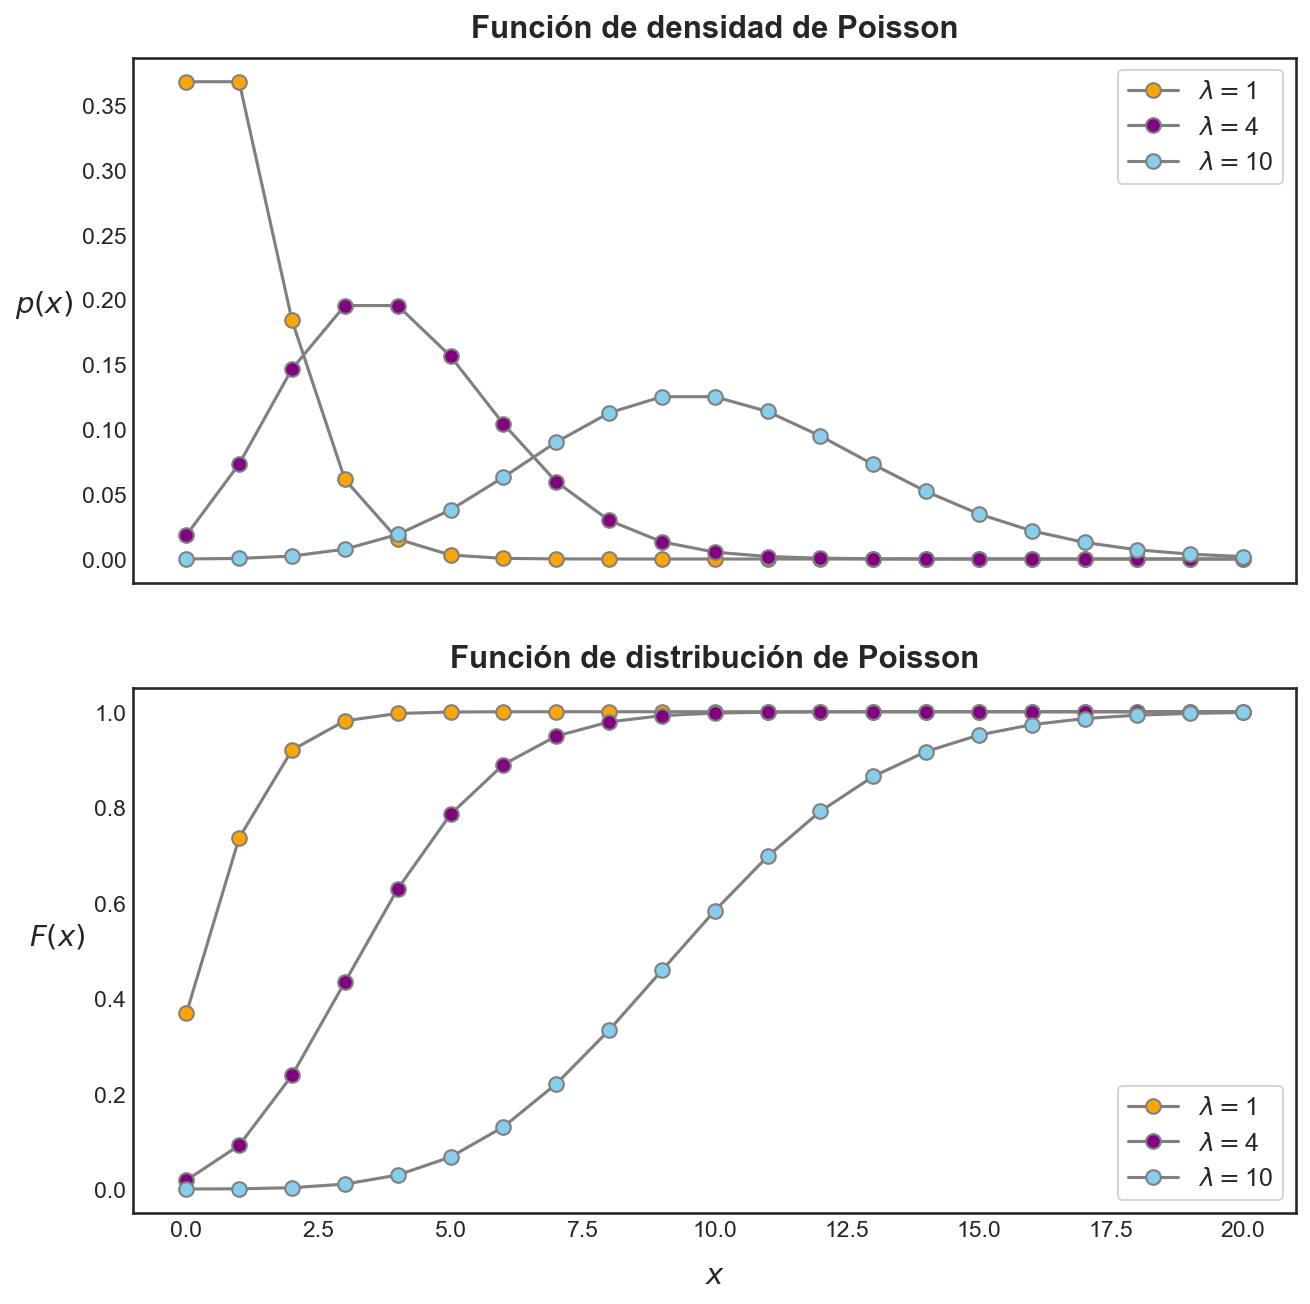

In [17]:
# Generamos un gráfico de una función de densidad de Poisson para varios valores del parámetro.
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=True)
x = np.linspace(start=0, stop=20, num=21)

for lambda_j, color_j in zip([1, 4, 10], ["orange", "purple", "skyblue"]):
    X_j = stats.poisson(lambda_j)
    ax[0].plot(
        x, X_j.pmf(x), marker="o", color="gray", 
        markerfacecolor=color_j, ms=7, label=r"$\lambda=$"+f"{lambda_j}"
    )
    ax[0].legend(loc="best", frameon=True, fontsize=12)
    ax[0].set_ylabel(r"$p(x)$", fontsize=14, labelpad=18, rotation=0)
    ax[1].plot(
        x, X_j.cdf(x), marker="o", color="gray", 
        markerfacecolor=color_j, ms=7, label=r"$\lambda=$"+f"{lambda_j}"
    )
    ax[1].legend(loc="best", frameon=True, fontsize=12)
    ax[1].set_ylabel(r"$F(x)$", fontsize=14, labelpad=18, rotation=0)

ax[0].set_title("Función de densidad de Poisson", pad=10, fontweight="bold", fontsize=15)
ax[1].set_title("Función de distribución de Poisson", pad=10, fontweight="bold", fontsize=15)
ax[1].set_xlabel(r"$x$", fontsize=14, labelpad=10);

◼︎

En los ejemplos anteriores, hemos construido variables aleatorias instanciando un objeto por medio de la clase correspondiente, y hemos calculado varios estadígrafos y elementos derivados de estas variables. Sin embargo, podemos calcular estos mismos elementos sin instanciar una variable a partir de estas clases. Por ejemplo, podemos obtener los valores de la distribución de Poisson con $\lambda=8$ simplemente partiendo desde ese valor:

In [18]:
# Distribución de Poisson de parámetro 8.
X_cdf = stats.poisson(8).cdf(x)

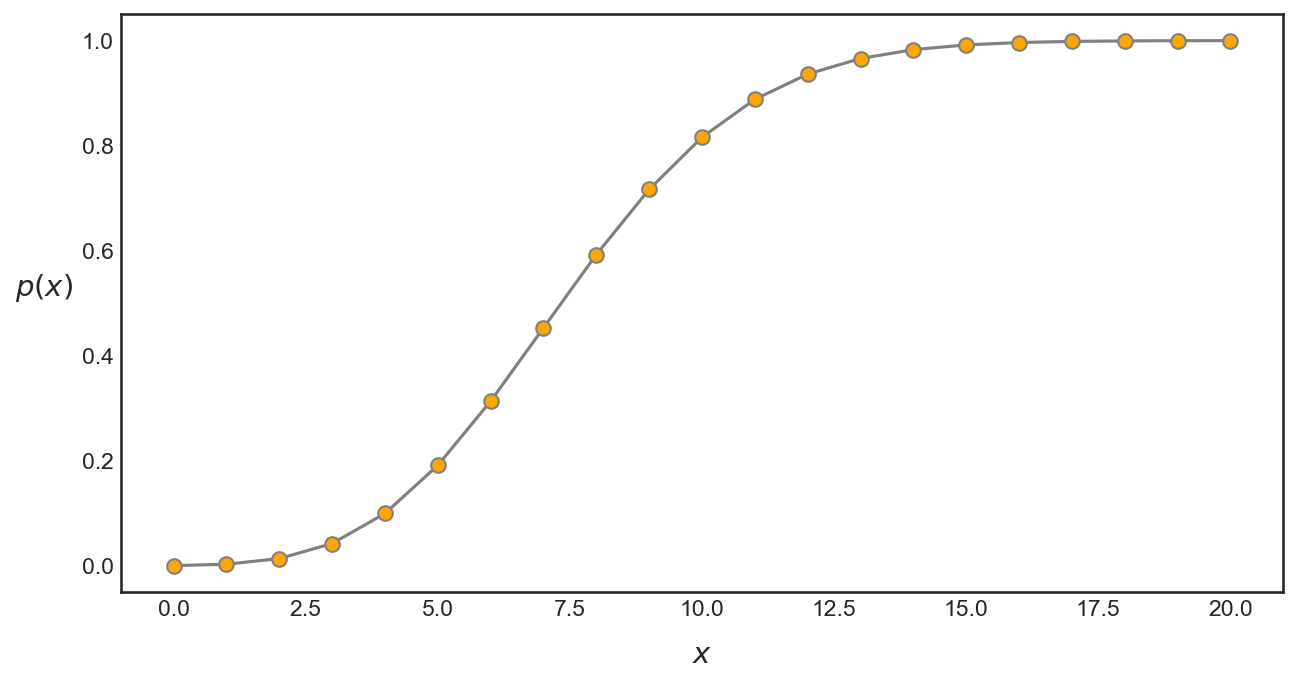

In [19]:
# Graficamos esta función.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, X_cdf, marker="o", color="gray", markerfacecolor="orange", ms=7)
ax.set_xlabel(r"$x$", fontsize=14, labelpad=10)
ax.set_ylabel(r"$p(x)$", fontsize=14, labelpad=18, rotation=0);

Hasta ahora, simplemente hemos revisado propiedades inherentes a las variables aleatorias creadas y sus distribuciones. Notemos que, aunque una función de distribución permite describir una variable aleatoria, la distribución como tal es completamente determinista. Para muestrear números aleatorios que están distribuidos de acuerdo a una determinada función de distribución de probabilidad, podemos usar el método `rvs()` (que hace referencia a *random variable sampling*). Este método requiere un único parámetro obligatorio que corresponde al tamaño de la muestra. En este caso, la muestra puede corresponder una única variable aleatoria (en cuyo caso, imputamos un único número entero), o bien, un arreglo de varios números enteros que representan las dimensiones de varias muestras:

In [20]:
# Extraeremos un total de 100 muestras de una distribución normal de media 0 y desviación
# estándar igual a 1.
X = stats.norm(loc=0, scale=1)
X_samp = X.rvs(size=100)

La muestra, al observar su distribución de frecuencias en un histograma, es claramente *parecida* a una distribución normal (porque, obviamente... ¡de ahí fue que la muestreamos!):

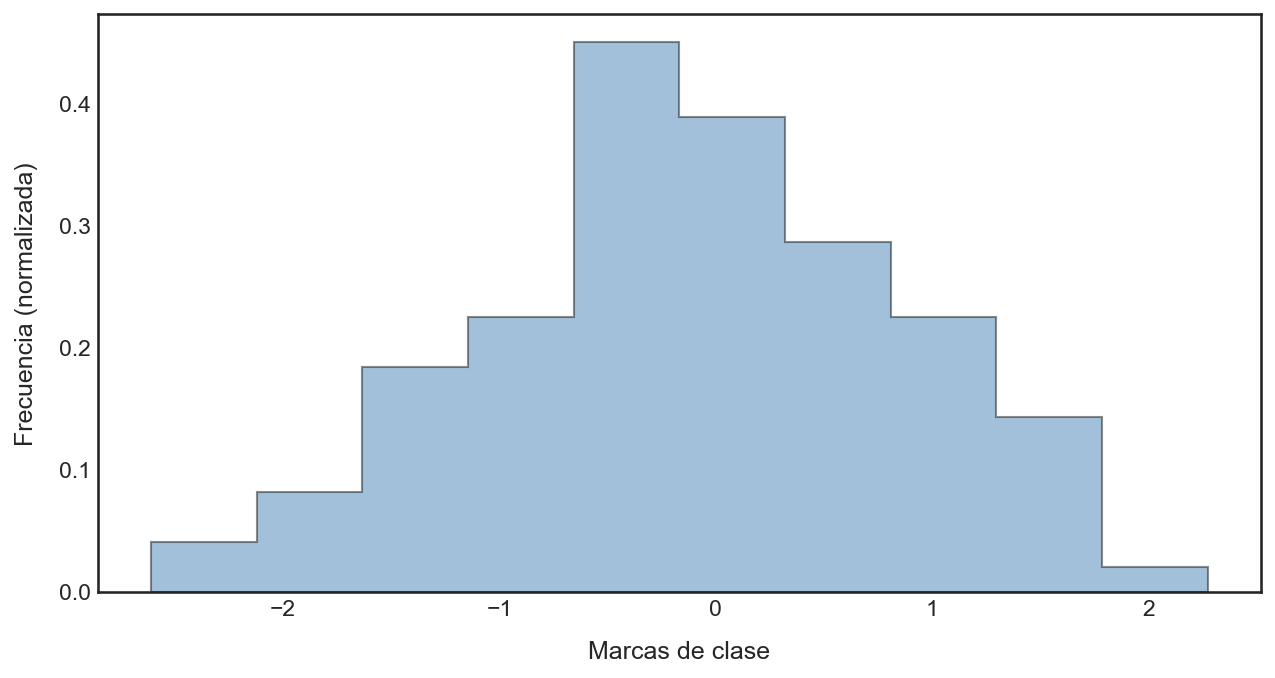

In [21]:
# Histograma para nuestra muestra.
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(x=X_samp, bins=10, color="steelblue", histtype="stepfilled", ec="k", density=True, alpha=0.5)
ax.set_xlabel("Marcas de clase", labelpad=10, fontsize=12)
ax.set_ylabel("Frecuencia (normalizada)", labelpad=10, fontsize=12);

Por supuesto, si queremos observar que efectivamente las muestras que obtenemos a partir de una determinada distribución efectivamente se corresponden con tales distribuciones, bastará con extraer una muestra lo *suficientemente* grande y graficar los respectivos histogramas, comparándolos con las correspondientes funciones de densidad. Ejemplificaremos este caso con tres funciones de densidad bien conocidas en la práctica:

- **$t$ de Student:** $f\left( x,\nu \right)  =\displaystyle \frac{\Gamma \left( \frac{\nu +1}{2} \right)  }{\sqrt{\pi } \Gamma \left( \frac{\nu }{2} \right)  } \left( 1+\frac{x^{2}}{\nu } \right)^{-\frac{\nu +1}{2} }$, donde $x\in \mathbb{R}$ y $\nu>0$ es un parámetro denominado grados de libertad de la distribución y $\Gamma$ es la función gamma.
- **Chi-cuadrado ($\chi^{2}$):** $f\left( x,k\right)  =\displaystyle \frac{1}{2^{\frac{k}{2} }\Gamma \left( \frac{k}{2} \right)  } x^{\frac{k}{2} -1}\exp \left( -\frac{x}{2} \right)$, donde $x>0$ y $k>0$ es un parámetro denominado grados de libertad de la distribución.
- **Exponencial:** $f\left( x,\lambda \right)  =\begin{cases}\lambda \exp \left( -\lambda x\right)  &;\  \mathrm{s} \mathrm{i} \  x\geq 0\\ 0&;\  \mathrm{s} \mathrm{i} \  x<0\end{cases} $, donde $\lambda>0$ es un parámetro denominado tasa de crecimiento (o decrecimiento) de la distribución.

Estas tres distribuciones pueden instanciarse mediante las clases `stats.t()`, `stats.chi2()` y `stats.expon()`:

In [22]:
# Instanciamos variables aleatorias con las distribuciones anteriores.
X = stats.t(df=8) # df es un parámetro que establece los grados de libertad.
Y = stats.chi2(df=5) # df es un parámetro que establece los grados de libertad.
Z = stats.expon(0.5)

Con los objetos anteriores instanciados, extraemos 2000 muestras de cada distribución y comparamos gráficamente la densidad observada versus la teórica:

In [23]:
# Extraemos 2000 muestras de estas distribuciones.
X_samp = X.rvs(size=2000)
Y_samp = Y.rvs(size=2000)
Z_samp = Z.rvs(size=2000)

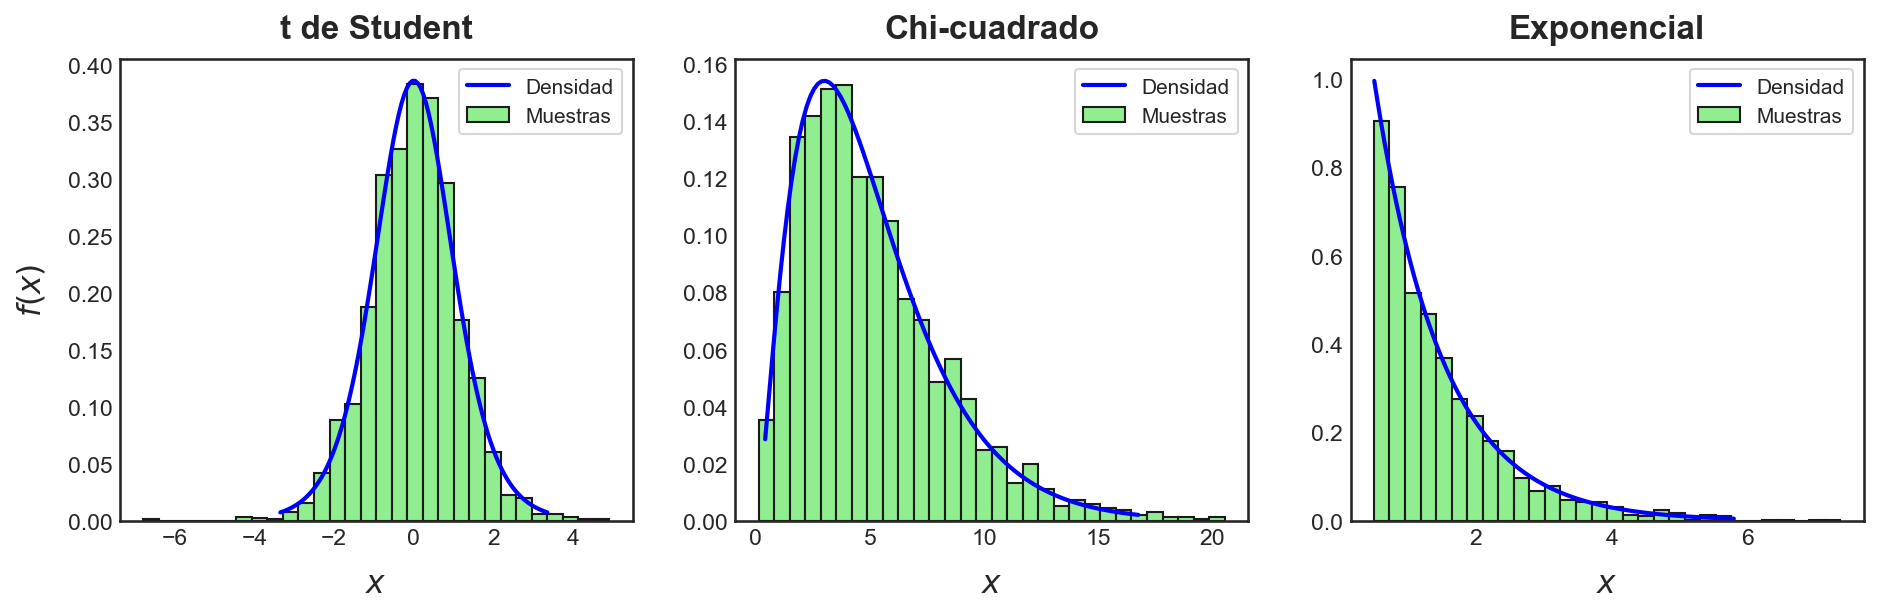

In [24]:
# Graficamos y comparamos.
fig, ax = plt.subplots(figsize=(15, 4), ncols=3, nrows=1)

x = np.linspace(*X.interval(0.99), num=100)
ax[0].plot(x, X.pdf(x), label="Densidad", color="blue", lw=2)
ax[0].hist(x=X_samp, bins=30, color="lightgreen", ec="k", density=True, label="Muestras")
ax[0].legend(loc="best", frameon=True, fontsize=10)
ax[0].set_xlabel(r"$x$", fontsize=15, labelpad=10)
ax[0].set_ylabel(r"$f(x)$", fontsize=15, labelpad=10)
ax[0].set_title("t de Student", fontsize=16, fontweight="bold", pad=10)

y = np.linspace(*Y.interval(0.99), num=100)
ax[1].plot(y, Y.pdf(y), label="Densidad", color="blue", lw=2)
ax[1].hist(x=Y_samp, bins=30, color="lightgreen", ec="k", density=True, label="Muestras")
ax[1].legend(loc="best", frameon=True, fontsize=10)
ax[1].set_xlabel(r"$x$", fontsize=15, labelpad=10)
ax[1].set_title("Chi-cuadrado", fontsize=16, fontweight="bold", pad=10)

z = np.linspace(*Z.interval(0.99), num=100)
ax[2].plot(z, Z.pdf(z), label="Densidad", color="blue", lw=2)
ax[2].hist(x=Z_samp, bins=30, color="lightgreen", ec="k", density=True, label="Muestras")
ax[2].legend(loc="best", frameon=True, fontsize=10)
ax[2].set_xlabel(r"$x$", fontsize=15, labelpad=10)
ax[2].set_title("Exponencial", fontsize=16, fontweight="bold", pad=10);

Y vemos que, efectivamente, estos conjuntos de datos muestreados desde estas tres distribuciones sí se aproximan bien a sus contrapartes teóricas para una suficiente cantidad de muestras.

La situación opuesta a la extracción de muestras a partir de una distribución conocida corresponde al ajuste de una distribución de probabilidad dada, de parámetros desconocidos, a un conjunto de datos. En un proceso de ajuste como éste, en general, queremos optimizar esos parámetros desconocidos de manera tal que la versomilitud inherente a esta data se maximice. Este procedimiento se conoce como ajuste de máxima verosimilitud, y es que el módulo `scipy.stats` utiliza para generar ajustes de conjuntos de datos a determinadas distribuciones por medio del método `fit()`.

Por ejemplo, consideremos la extracción de 300 muestras aleatorias de una distribución Gamma, cuya función de densidad de parámetro $a>0$ se define como

$$f\left(x,a\right)=\displaystyle \frac{x^{a-1}\exp \left( -x\right)}{\Gamma \left(a\right)}$$
</p> <p style="text-align: right;">$(1.3)$</p>

donde $x\geq 0$. Podemos construir una variable aleatoria de tipo Gamma mediante la clase `scipy.stats.gamma()`, usando además el parámetro `a`. En nuestro caso, usaremos `a=6`. Una vez que extraigamos la muestra, construiremos un ajuste mediante el método `fit()` y compararemos los resultados entre las funciones de densidad original y recuperada por medio de este ajuste:

In [25]:
# Partimos definiendo una variable aleatoria tipo Gamma.
X = stats.gamma(a=6)

In [26]:
# Extraemos una muestra de 300 realizaciones de esta variable.
X_samp = X.rvs(size=300)

In [27]:
# Generamos el ajuste.
a, loc, scale = stats.gamma.fit(X_samp)

In [28]:
# Verificamos los parámetros que hemos obtenido por medio del ajuste.
print(f"Parámetro a = {a}")
print(f"Parámetro de localización = {loc}")
print(f"Parámetro de escala = {scale}")

Parámetro a = 3.5347652747923464
Parámetro de localización = 1.274865890639628
Parámetro de escala = 1.3381544440407538


Vemos pues que el ajuste ha logrado estimar que el parámetro $a$ es igual a $5.291930293145382$. Originalmente es igual a 5. Los parámetros que son propios de una distribución, como $a$ en el caso de la distribución Gamma, $\nu$ en el caso de la distribución t de Student, y otros más propios de cada una, son comúnmente denominados **parámetros de forma**, ya que controlan la geometría intrínseca a cada una de las correspondientes funciones de densidad. Sin embargo, también existen otros parámetros que controlan la posición relativa de las distribuciones con respecto a la media (localización) y su dispersión (escala). Por esa razón, un ajuste típico en `scipy.stats` devolverá estos tres parámetros.

Comparemos gráficamente ambas funciones de densidad:

In [29]:
# Instanciamos una variable aleatoria con los parámetros encontrados mediante el ajuste.
X_fit = stats.gamma(a, loc, scale)

In [30]:
# Obtenemos las funciones de densidad y distribución para ambas variables aleatorias.
x = np.linspace(*X.interval(0.99), num=100)
X_pdf, X_cdf = X.pdf(x), X.cdf(x)
X_fit_pdf, X_fit_cdf = X_fit.pdf(x), X_fit.cdf(x)

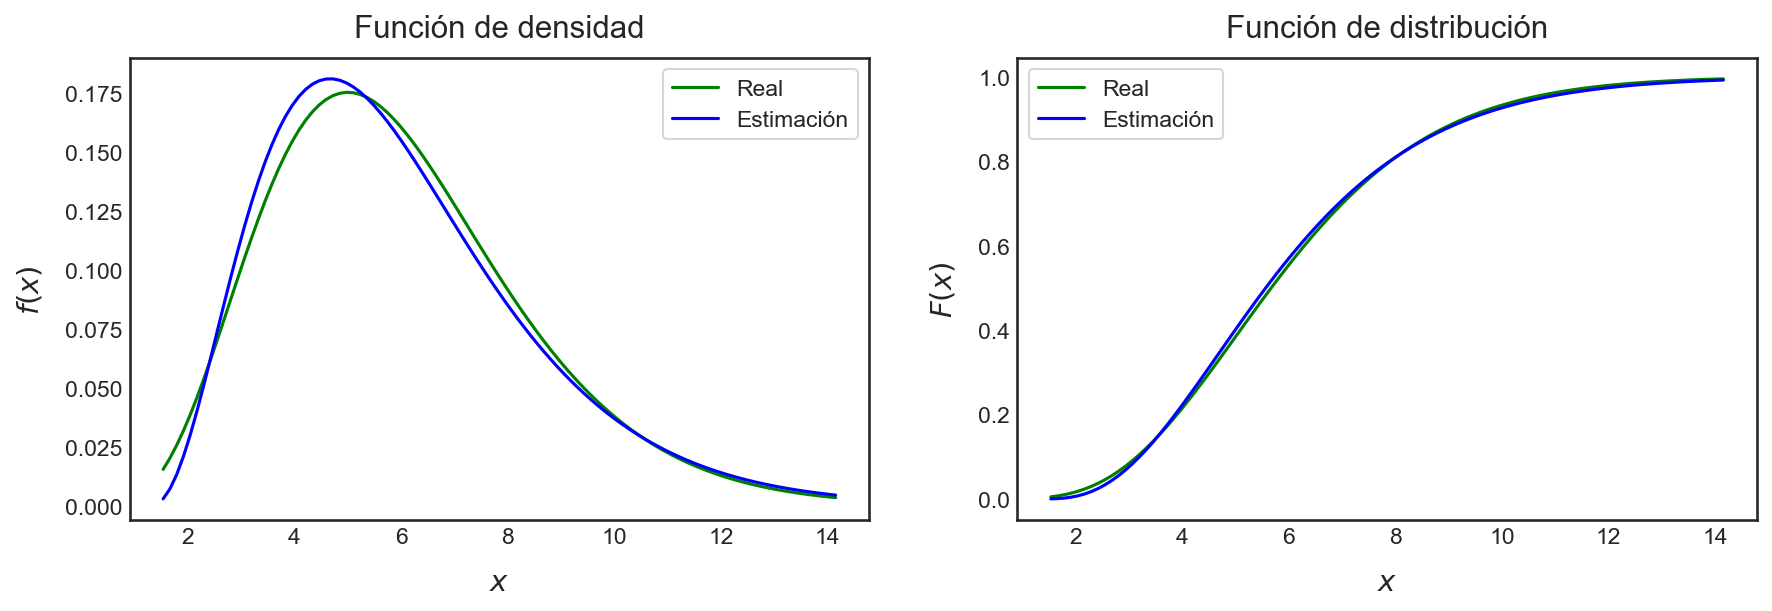

In [31]:
# Comparativa entre funciones de densidad.
fig, ax = plt.subplots(figsize=(14, 4), ncols=2)

ax[0].plot(x, X_pdf, color="green", label="Real")
ax[0].plot(x, X_fit_pdf, color="blue", label="Estimación")
ax[0].legend(loc="best", frameon=True)
ax[0].set_xlabel(r"$x$", fontsize=14, labelpad=10)
ax[0].set_ylabel(r"$f(x)$", fontsize=14, labelpad=10)
ax[0].set_title("Función de densidad", fontsize=15, pad=10)

ax[1].plot(x, X_cdf, color="green", label="Real")
ax[1].plot(x, X_fit_cdf, color="blue", label="Estimación")
ax[1].legend(loc="best", frameon=True)
ax[1].set_xlabel(r"$x$", fontsize=14, labelpad=10)
ax[1].set_ylabel(r"$F(x)$", fontsize=14, labelpad=10)
ax[1].set_title("Función de distribución", fontsize=15, pad=10);

Vemos que hemos logrado un ajuste bastante decente. Aunque por supuesto, el ejercicio anterior es de carácter meramente explicativo. En el mundo real, ajustar una distribución a un conjunto de datos previamente procesado requiere tomar la decisión relativa a la distribución que tomaremos como referencia del ajuste. Esa decisión no suele ser sencilla, y por esa razón, existen **pruebas de bondad del ajuste**, con sus correspondientes métricas de error y potencia, que permiten rankear resultados relativos a cada uno de los procedimientos de ajuste.

### Pruebas de hipótesis.

Las pruebas de hipótesis constituyen un elemento esencial del método científico, el cual, en términos bien generales, establece que una hipótesis i unferencia debe investigarse de manera objetiva y que, frente al rechazo o aceptación de la misma, debemos tomar esa decisión con base en evidencia concreta, que a su vez se basa en observaciones del proceso o fenómeno de interés. Las pruebas de hipótesis, en estadística, tienen un significado más específico, y que guarda relación con la evaluación de si una hipótesis es razonable o no, sobre la base de los datos disponibles. Como tal, es una de las aplicaciones más importantes de la estadística.

En una prueba de hipótesis, abordamos un problema de naturaleza estadística considerando una hipótesis determinada, que denominamos hipótesis nula ($H_{0}$) y que representa nuestro estado de conocimiento relativo al problema en cuestión, y una hipótesis alternativa ($H_{1}$). Queremos determinar cuál de estas hipótesis escogeremos, una vez que aplicamos el problema a un cierto número de experimentos. Ambas hipótesis son complementarias y, por extensión, deben ser mutuamente excluyentes, de manera que la aceptación de una implica el rechazo de la otra.

Es importante considerar que la hipótesis nula es llamada así en el sentido de que estamos aceptando que ésta implica un efecto de no cambio o consecuencia sobre nuestro estado del conocimiento. Es decir, a partir de nuestra *opinión* actual, $H_{0}$ se identifica con que dicha *opinión* no cambia, o no mejora, o cualquier significado similar. Por esta razón, $H_{0}$ representa la hipótesis que mantendremos a no ser que los datos indiquen lo contrario, y puede entenderse como neutra. No podemos considerarla probada, pero sí rechazarla a partir de los datos.

Una vez que hemos definido $H_{0}$ y $H_{1}$, debemos recolectar data para construir evidencia para nuestra prueba de hipótesis, por ejemplo, por medio de mediciones, observaciones o estudios. El siguiente paso es encontrar un **estadístico de prueba** que pueda ser calculado a partir de nuestra data y cuya función de distribución de probabilidad pueda ser determinada bajo la hipótesis nula. A continuación, podemos evaluar nuestra data mediante el cálculo de la probabilidad (o **p-valor**) de obtener el valor observado del estadístico de prueba usando la distribución de probabilidad que estamos contrastando en nuestra prueba de hipótesis. Si el p-valor es menor que un valor umbral determinado, que llamamos **nivel de significancia** de la prueba, y suele denotarse como $\alpha$, podemos concluir que no es probable (o no existe evidencia estadística) que la data observada pueda describirse conforme la distribución correspondiente a $H_{0}$. Por tanto, en este caso, podemos rechazar la hipótesis nula en favor de la hipótesis alternativa.

Una vez realizada la prueba de hipótesis, conforme lo anterior, se pueden dar los cuatro casos que se resumen en la Tabla (1.3).

</p> <p style="text-align: center;">Tabla (1.3): Posibles resultados en una prueba de hipótesis</p>

|                                     | **La hipótesus nula ($H_{0}$) es...** |                |
| :---------------------------------- | :-----------------------------------: | :------------: |
| **Decisión con respecto a $H_{0}$** | **Verdadera**                         | **Falsa**      |
| **No se rechaza** | Inferencia correcta<br>o verdadero negativo (VN)<br>(probabilidad = $1-\alpha$) | Error del tipo II<br>o falso negativo (FN)<br>(probabilidad = $\beta$) |
| **Se rechaza**    | Error del tipo I<br>o falso positivo (FP)<br>(probabilidad = $\alpha$) | Inferencia correcta<br>o verdadero positivo (VP)<br>(probabilidad = $1-\beta$)|

Una prueba de hipótesis *perfecta* debiera tener cero falsos positivos y cero falsos negativos. Sin embargo, debido a la naturaleza probabilística de los métodos estadísticos, no podemos saber a ciencia cierta si las conclusiones obtenidas en el contexto estadístico son correctas (razón por la cual la hipótesis nula $H_{0}$ nunca se considera probada). Y siempre que hay incertidumbre, también hay una probabilidad de cometer un error. Por esta razón, todas las pruebas de hipótesis pueden resultar en errores del tipo I y del tipo II, como se muestra en la Tabla (1.3):

- El error del tipo I se corresponde con la probabilidad de rechazar $H_{0}$ cuando ésta es cierta. Las pruebas de hipótesis suelen diseñarse considerando como condición que dicha probabilidad no sobrepase un umbral determinado y que, conforme lo que explicamos previamente, se corresponde con el nivel de significación de la prueba. De la misma forma, el error del tipo II igualmente suele denotarse como $\alpha$. Usualmente, el nivel de significación se fija en 0.05 (o 5%), lo que implica que estamos dispuestos a aceptar, como máximo, un 5% de probabilidad de rechazar incorrectamente la hipótesis nula.

- El error del tipo II se corresponde con la probabilidad de aceptar $H_{0}$ cuando ésta no es cierta, y se denota como $\beta$. Este valor se relaciona con la **potencia** de la prueba de hipótesis, la cual a su vez corresponde a la probabilidad de que dicha prueba rechace correctamente la hipótesis nula cuando una hipótesis alternativa ($H_{1}$) es cierta, y que se calcula como $1-\beta$.

Existe un trade-off entre ambos tipos de error: Para cualquier conjunto de datos dado, el esfuerzo de reducir un tipo de error generalmente resulta en el incremento del otro. Dicho trade-off suele controlarse por medio del nivel de significación de la prueba.

En general, el paso más desafiante en una prueba de hipótesis corresponde a conocer la distribución (muestral) del estadístico de prueba. Afortunadamente, muchas de estas pruebas caen en algunas categorías estándar para las cuales tales distribuciones de probabilidad son conocidas. Algunos de estos casos conocidos se ilustran en la Tabla (1.4).

</p> <p style="text-align: center;">Tabla (1.4): Resumen de algunos casos comunes de pruebas de hipótesis con sus correspondientes<br>distribuciones y su función de implementación en Scipy</p>

| Hipótesis nula ($H_{0}$) | Distribución | Función de **Scipy** asociada |
| :----------------------- | :----------- | :---------------------------- |
| La media de una población<br>corresponde a un valor<br>determinado | Distribución normal (`stats.norm`)<br>o t de Student (`stats.t`) | `stats.ttest_1samp()` |
| Dos variables aleatorias tienen<br>la misma media (muestras<br>independientes o pareadas) | Distribución t de Student (`stats.t`) | `stats.ttest_ind()` |
| Un valor categórico ocurre con<br>una frecuencia dada (suma de<br>cuadrados de variables<br>normalmente distribuidas) | Distribución $\chi^{2}$ (`stats.chi2`) | `stats.chisquare()` |
| Dos variables aleatorias discretas<br>son independientes (en una<br>tabla de contingencia) | Distribución $\chi^{2}$ (`stats.chi2`) | `stats.chi2_contingency()` |
| Igualdad de varianzas en muestras<br>de dos o más variables aleatorias | Distribución F (`stats.f`) | `stats.barlett()` o <br>`stats.levene()` |
| No hay correlación entre dos<br>variables | Distribución Beta (`stats.beta`,<br>`stats.mstats.betai`) | `stats.pearsonr()` (caso lineal) o<br>`stats.spearmanr()` (caso no lineal) |
| Dos (o más) variables tienen la<br>misma media en su correspondiente<br>población (ANOVA o análisis de<br>varianza) | Distribución F (`stats.f`) | `stats.f_oneway()` o<br>`stats.kruskal()` |

Cada una de las pruebas de hipótesis listadas en la Tabla (1.4) tiene su correspondiente estadístico de prueba, cuya distribución es la especificada en dicha tabla. Por ejemplo, si hemos establecido que la media $\mu$ de una población es igual a un valor $\mu_{0}$, caemos en el primero de los casos listados en la Tabla (1.4). En este caso, podemos obtener una muestra de la población correspondiente y usar la media muestral $\bar{x}$ para calcular el siguiente estadístico de prueba

$$Z=\displaystyle \frac{\bar{x}-\mu_{0}}{\sigma/\sqrt{n}}$$
</p> <p style="text-align: right;">$(1.4)$</p>

donde $n$ es el tamaño de la muestra. Si el tamaño de la población es muy grande y la varianza $\sigma^{2}$ es conocida, entonces es razonable asumir que este estadístico de prueba se distribuye normalmente. Si la varianza es desconocida, podemos sustituir $\sigma^{2}$ con la varianza muestral $s^{2}$, en cuyo caso el estadístico de prueba resultante tiene una distribución t de Student con $n-1$ grados de libertad. Independiente de la distribución que eventualmente utilicemos, podemos calcular un p-valor para estadístico de prueba usando la distribución correspondiente.

Ejemplifiquemos lo anterior usando el módulo `scipy.stats`. Consideremos entonces una prueba de hipótesis en la cual establecemos que una variable aleatoria $X$ tiene una media $\mu_{0}$ igual a 1. Dado un conjunto de muestras de $X$, queremos probar si esta data muestreada efectivamente nos permite aceptar la hipótesis nula. En nuestro ejemplo, simulamos estas muestras extrayendo 100 de las mismas de una distribución ligeramente diferente que la que queremos contrastar en nuestra prueba de hipótesis (para la cual, $\mu=0.8$):

In [32]:
# Partimos definiendo los valores.
mu0 = 1.0 # El valor de la media que hemos establecido en nuestra hipótesis nula.
mu = 0.8 # El valor real de la media.
sigma = 0.5 # La desviación estándar de la población (que asumiremos conocida).

In [33]:
# Definimos la variable aleatoria que se corresponde con la población.
X = stats.norm(loc=mu, scale=sigma)

In [34]:
# Extraemos las muestras de esta población.
n = 100 # Número de muestras.
X_samp = X.rvs(n) # Arreglo con las muestras extraídas.

Dada la data que hemos muestreado (`X_samp`), ahora procedemos a calcular nuestro estadístico de prueba. Como la desviación estándar de la población completa es conocida ($\sigma=0.5$), podemos usar la Ec. (1.4), que se corresponde con un estadístico normalmente distribuido:

In [35]:
# Calculamos el estadístico de prueba.
Z = (X_samp.mean() - mu0) / (sigma / np.sqrt(n))

In [36]:
# Mostramos el valor en pantalla.
print(f"El valor del estadístico de prueba Z es: {round(Z, 3)}")

El valor del estadístico de prueba Z es: -3.94


Procedemos ahora a comparar este valor del estadístico de prueba con la distribución correspondiente, a fin de obtener un p-valor. Debido a que este estadístico se distribuye normalmente, podemos realizar el contraste usando el valor de la correspondiente función de cuantía considerando el nivel de significación de la prueba. Debido a que la función de densidad normal es simétrica con respecto a la media, dicho nivel se reparte en ambas colas, lo que implica que testeamos contra un valor de 0.025 (2.5% por cola, razón por la cual este tipo de contraste se conoce como **prueba bilateral**). Luego tenemos:

In [37]:
# Calculo del valor correspondiente a la distribución normal.
z_calc = stats.norm().ppf(0.025)
z_calc

-1.9599639845400545

Debido a que nuestro estadístico de prueba es $Z=-2.963$ (`Z`) es menor que el valor umbral calculado `z_calc` para una prueba de hipótesis con un nivel de significación del 5%, contamos con suficiente evidencia estadística para rechazar la hipótesis nula en este caso.

Lo anterior podemos ilustrarlo mediante el concepto de **región de rechazo**, la que corresponde a la región de la distribución considerada en la prueba de hipótesis (y contralada por el nivel de significación de la prueba) que permite definir para qué valores del estadístico de prueba aceptamos la hipótesis nula (o no). Conforme lo que revisamos previamente, la región de rechazo para la prueba de hipótesis que establece que la media es igual a un valor determinado, con varianza conocida, se define como

$$\mathrm{R} \mathrm{C} =\left\{ Z<-z_{1-\frac{\alpha }{2} }\cup Z>z_{1-\frac{\alpha }{2} }\right\}$$
</p> <p style="text-align: right;">$(1.5)$</p>

Donde $z_{1-\frac{\alpha }{2}}$ hace referencia al valor de $z$ tal que la función de densidad normal toma un valor igual a $1-\frac{\alpha }{2}$. Luego, para nuestro caso:

In [38]:
min_bound = -stats.norm().ppf(1-0.05/2)
max_bound = stats.norm().ppf(1-0.05/2)

Por lo tanto, la prueba de hipótesis debiera rechazarse si el estadístico de prueba es menor que `min_bound`, o mayor que `max_bound`. De lo anterior, dado que `Z = -2,963`, y

In [39]:
print(f"min_bound = {min_bound}")
print(f"max_bound = {max_bound}")

min_bound = -1.959963984540054
max_bound = 1.959963984540054


Vemos que `Z` es menor que `min_bound`, lo que, nuevamente, nos lleva a la conclusión de que no existe evidencia estadística que permita aceptar la hipótesis nula. Es decir, no existe evidencia que nos permita concluir que la media de la población de la cual se han extraído los valores respectivos en `X_samp`, es igual a 1 (esto es algo que ya sabíamos de antes, porque construimos `X` de tal forma que su valor esperado fuese igual a 0.8).

Podemos graficar este resultado como sigue:

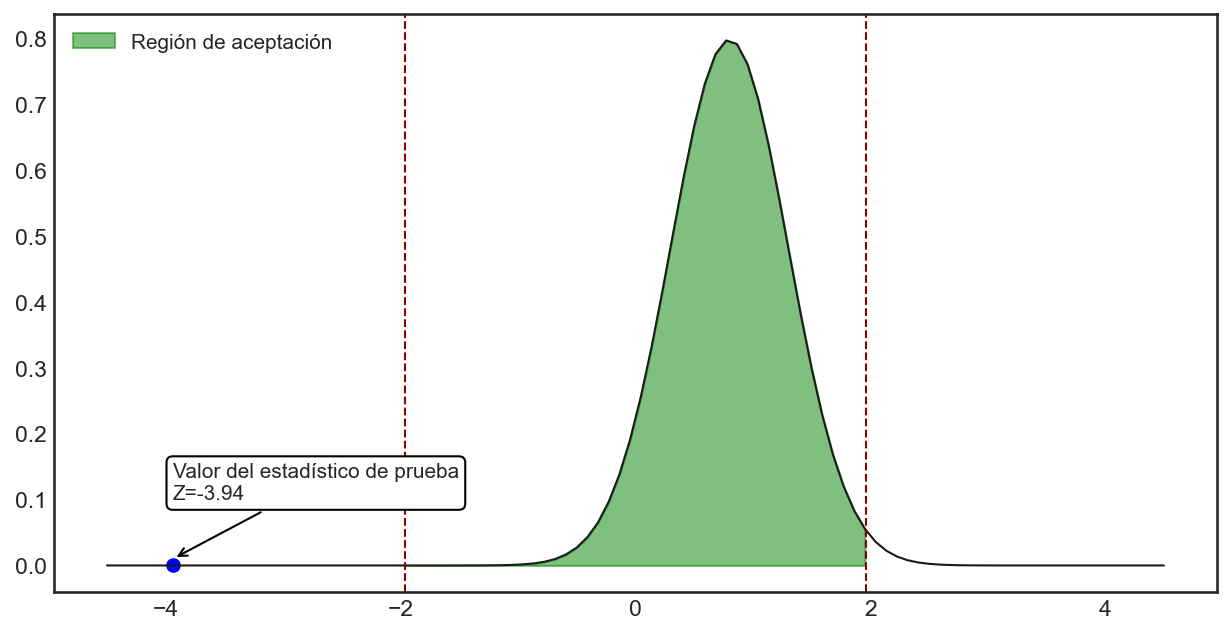

In [40]:
# Representación gráfica de nuestra prueba de hipótesis.
fig, ax = plt.subplots(figsize=(10, 5))

x = np.linspace(start=-4.5, stop=4.5, num=100)
X_pdf = X.pdf(x)

ax.plot(x, X_pdf, linewidth=1, color="k")
ax.scatter(Z, X.pdf(Z), color="blue")
ax.axvline(x=min_bound, linestyle="--", color="darkred", linewidth=1)
ax.axvline(x=max_bound, linestyle="--", color="darkred", linewidth=1)
ax.fill_between(
    x=x, y1=X_pdf, where=(x >= min_bound) & (x <= max_bound),
    color="green", alpha=0.5, label="Región de aceptación"
)
ax.legend(loc="upper left", fontsize=10)
ax.annotate(
    text=f"Valor del estadístico de prueba\nZ={round(Z, 3)}", xy=(Z, 0.01), xytext=(Z, 0.1),
    size=10, arrowprops=dict(color="black", arrowstyle="->"),
    bbox=dict(boxstyle="round", alpha=1, color="white", ec="black")
);

Es posible calcular directamente el p-valor, ahorrándonos el análisis de la región de rechazo y el contraste correspondiente. Para ello, dado que la prueba de hipótesis es bilateral, debemos evaluar la función de distribución normal acumulada en el valor calculado para el estdístico de prueba `Z` y multiplicarlo por 2. De esta manera, tenemos:

In [41]:
# Cálculo del p-valor.
p_value = 2 * stats.norm().cdf(-np.abs(Z))
p_value

8.143320062950467e-05

Vemos pues que este p-valor es muy pequeño, más pequeño en magnitud que el nivel de significación $\alpha = 0.05$ que convenimos utilizar en nuestra prueba de hipótesis, lo que implica, nuevamente, rechazar la hipótesis nula.

Estudiemos el caso para el cual la varianza $\sigma^{2}$ de la población es desconocida. En este caso, el estadístico de prueba se denomina $T$, y utiliza la desviación estándar muestral ($s$) para su cálculo, teniendo una distribución subyacente de tipo t de Student:

$$T=\displaystyle \frac{\bar{x} -\mu_{0}}{s/\sqrt{n}}$$
</p> <p style="text-align: right;">$(1.6)$</p>

Calculamos pues la desviación estándar muestral:

In [42]:
# Varianza de la muestra de datos.
s = X_samp.std(ddof=1)

Y ahora calculamos nuestro estadístico de prueba:

In [43]:
# Estadístico de prueba para el caso de varianza poblacional desconocida.
T = (X_samp.mean() - mu0) / (s / np.sqrt(n))
T

-4.206001828499189

La región de rechazo para esta prueba de hipótesis es

$$\mathrm{R} \mathrm{C} =\left\{ T<-t_{\left( 1-\frac{\alpha }{2} ,n-1\right)  }\cup T>t_{\left( 1-\frac{\alpha }{2} ,n-1\right)  ,}\right\}$$
</p> <p style="text-align: right;">$(1.6)$</p>

Donde $t_{\left( 1-\frac{\alpha }{2} ,n-1\right)  ,}$ hace referencia al valor de la distribución t de Student, evaluada en $1-\frac{\alpha }{2}$, con $n-1$ grados de libertad. De esta manera tenemos que:

In [44]:
# Límites que definen la región de rechazo.
min_bound = -stats.t(df=n-1).ppf(1-0.05/2)
max_bound = stats.t(df=n-1).ppf(1-0.05/2)

Nuevamente graficamos nuestro resultado:

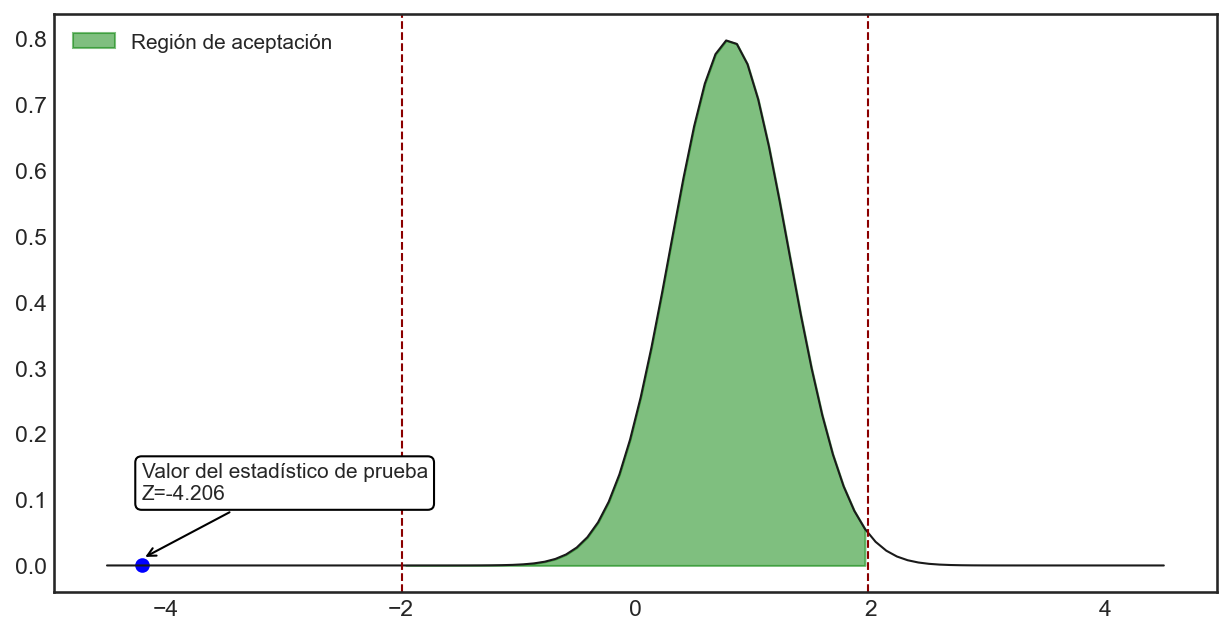

In [45]:
# Representación gráfica de nuestra prueba de hipótesis.
fig, ax = plt.subplots(figsize=(10, 5))

x = np.linspace(start=-4.5, stop=4.5, num=100)
X_pdf = X.pdf(x)

ax.plot(x, X_pdf, linewidth=1, color="k")
ax.scatter(T, X.pdf(T), color="blue")
ax.axvline(x=min_bound, linestyle="--", color="darkred", linewidth=1)
ax.axvline(x=max_bound, linestyle="--", color="darkred", linewidth=1)
ax.fill_between(
    x=x, y1=X_pdf, where=(x >= min_bound) & (x <= max_bound),
    color="green", alpha=0.5, label="Región de aceptación"
)
ax.legend(loc="upper left", fontsize=10)
ax.annotate(
    text=f"Valor del estadístico de prueba\nZ={round(T, 3)}", xy=(T, 0.01), xytext=(T, 0.1),
    size=10, arrowprops=dict(color="black", arrowstyle="->"),
    bbox=dict(boxstyle="round", alpha=1, color="white", ec="black")
);

Como el valor de `T` está en la región de rechazo, concluimos que no existe evidencia estadística que nos permita aceptar la hipótesis nula. Si calculamos el p-valor, notaremos que su magnitud es menor que la del nivel de significación de la prueba de hipótesis, lo que reafirma esta conclusión:

In [46]:
# Cálculo del p-valor.
p_value = stats.t(df=n-1).cdf(-np.abs(T))
p_value

2.8569153323021214e-05

Por propósitos únicamente pedagógicos, ambas pruebas de hipótesis anteriores las hemos desarrollado *manualmente*. Es decir, hemos calculado *desde cero* los estadísticos de prueba y los correspondientes p-valores. Sin embargo, en la Tabla (1.4), hemos detallado que existen funciones que permiten construir estas pruebas de manera directa. Por ejemplo, para el caso de la prueba anterior, considerando una varianza poblacional desconocida, podemos usar la función `stats.ttest_1samp()`, considerando los argumentos `a` (que es un arreglo que contiene todas las muestras que vamos a testear) y `popmean` (que corresponde a la media poblacional que hemos establecido en nuestra hipótesis nula que testearemos):

In [47]:
# Aplicación directa de una prueba t de Student.
T, p_value = stats.ttest_1samp(a=X_samp, popmean=mu0)

In [48]:
# Mostramos en pantalla los resultados de nuestra prueba.
print(f"Estadístico de prueba T = {round(T, 3)}")
print(f"p-valor = {round(p_value, 4)}")

Estadístico de prueba T = -4.206
p-valor = 0.0001


Notemos que los valores que hemos obtenido son aproximadamente iguales a los que calculamos manualmente, y nos permiten llegar a las mismas conclusiones.

**Ejemplo 1.1:** Consideremos una prueba de hipótesis de diferencia de medias. En esta prueba, nuestra hipótesis nula ($H_{0}$) establece que no existe diferencia significativa entre las medias de dos poblaciones que, suponemos, son independientes. Podemos simular una prueba de este tipo considerando dos variables aleatorias normales con medias poblacionales escogidas aleatoriamente:

In [49]:
# Medias poblaciones escogidas aleatorias
rng = np.random.default_rng(seed=42)
mu1, mu2 = rng.integers(low=0, high=10, size=2)

In [50]:
# Desviaciones estándar para estas poblaciones.
sigma1, sigma2 = rng.random(size=2)

In [51]:
# Definimos las variables aleatorias para estas medias previamente definidas.
X1 = stats.norm(loc=mu1, scale=sigma1)
X2 = stats.norm(loc=mu2, scale=sigma2)

Extraeremos, de cada una de estas poblaciones, un total de 50 muestras:

In [52]:
N = 50 # Número de muestras.
X_samp1 = X1.rvs(N) # Muestras extraidas para la primera población.
X_samp2 = X2.rvs(N) # Muestras extraidas para la segunda población.

Para evaluar si las muestras extraídas previamente nos proveen de suficiente evidencia estadística para rechazar la hipótesis nula (es decir, para concluir que ambas medias poblacionales no son iguales), podemos proceder mediante una prueba t de Student para dos muestras independientes en el caso que no conozcamos las varianzas de cada población. Vamos a asumir que no las conocemos para efectos de este ejemplo, y que no son iguales. Si las poblaciones subyacentes se distribuyen normalmente, el estadístico de prueba para el contraste se calcula como

$$T=\displaystyle \frac{\bar{x}_{1} -\bar{x}_{2} -\triangle \bar{x} }{\sqrt{\frac{s^{2}_{1}}{n_{1}} +\frac{s^{2}_{2}}{n_{2}}}}$$
</p> <p style="text-align: right;">$(1.7)$</p>

Este estadístico tiene una distribución t de Student con $\nu$ grados de libertad, donde

$$\nu =\displaystyle \frac{\left(\displaystyle \frac{s^{2}_{1}}{n_{1}} +\frac{s^{2}_{2}}{n_{2}} \right)^{2}  }{\displaystyle \frac{\left( s^{2}_{1}/n_{1}\right)^{2}  }{n_{1}-1} +\frac{\left( s^{2}_{2}/n_{2}\right)^{2}  }{n_{2}-1} } $$
</p> <p style="text-align: right;">$(1.8)$</p>

En las ecuaciones anteriores, $n_{i}$ corresponde al número de muestras correspondientes a la población $X_{i}$ y $s^{2}_{i}$ corresponde a su varianza muestral.

Para evitar el cálculo manual del estadístico de prueba (y del correspondiente p-valor y/o la región de rechazo), podemos usar la función `stats.ttest_ind()`, la cual recibe como argumentos a las muestras extraídas de cada población:

In [53]:
# Aplicación de la prueba t de Student para dos muestras independientes.
T, p_value = stats.ttest_ind(X_samp1, X_samp2)

In [54]:
# Mostramos en pantalla los resultados de nuestra prueba.
print(f"Estadístico de prueba T = {round(T, 3)}")
print(f"p-valor = {round(p_value, 4)}")

Estadístico de prueba T = -46.373
p-valor = 0.0


Como el p-valor es evidentemente menor que el nivel de significación de la prueba (cualquiera sea éste), es claro que contamos con evidencia estadística suficiente para rechazar la hipótesis nula: Las medias de las poblaciones inherentes a cada conjunto independiente de muestras sí presentan una diferencia significativa. ◼

**Ejemplo 1.2:** Vamos a repetir la prueba de hipótesis anterior, pero esta vez considerando un caso de estudio un tanto más real. Consideremos pues el dataset `sag_record_01_2020.csv`, el cual corresponde al registro de tratamientos horarios (tph) de un mes de operación de dos molinos SAG en una planta de molienda, siendo cada observación correspondiente a una hora de operación. El jefe de operaciones de la planta nos comenta que, si bien los circuitos de molienda SAG son *gemelos* (ambos molinos son iguales en dimensiones), existen diferencias en la calidad del mineral que, a su entender, le permiten concluir que la media de tratamiento en ambos molinos no es la misma.

Podemos emplear una prueba de hipótesis de diferencia de medias con varianza desconocida para contrastar la hipótesis anterior, considerando la data anterior, considerando un nivel de significación del 5%. Para ello, primero, accedemos a esta data:

In [55]:
# Accedemos a la data.
data = pd.read_csv("datasets/sag_record_01_2020.csv", sep=";")

In [56]:
# Mostramos las primeras filas de este DataFrame.
data.head()

,FECHA,MINERAL SAG1,MINERAL SAG2
0,01-01-20 00:00,2822.040527,2035.645630
1,01-01-20 01:00,2788.006348,2092.776367
2,01-01-20 02:00,2764.037109,2019.348755
3,01-01-20 03:00,2828.992676,2096.163818
4,01-01-20 04:00,2761.961670,2088.106934


La aplicación de la preuba de hipótesis, en este caso, es directa:

In [57]:
# Aplicación de la prueba t de Student para dos muestras independientes.
T, p_value = stats.ttest_ind(data["MINERAL SAG1"].dropna(), data["MINERAL SAG2"].dropna())

In [58]:
# Mostramos en pantalla los resultados de nuestra prueba.
print(f"Estadístico de prueba T = {round(T, 3)}")
print(f"p-valor = {p_value}")

Estadístico de prueba T = 9.89
p-valor = 2.3801172866250656e-22


Luego, dado que el p-valor es muchisimo menor que el nivel de significación de nueatra prueba de hipótesis, contamos con suficiente evidencia estadística para rechazar la hipótesis nula: Efectivamente, a pesar de que ambos molinos son exactamente iguales, estos presentan diferencias significativas en sus tratamientos horarios de mineral, lo que puede deberse a que el mineral que éstos procesan presenta características físicas diferentes (como granulometría o dureza). ◼

### Estimación de funciones de densidad.

Hasta ahora, hemos descrito variables aleatorias con distribuciones que pueden ser completamente determinadas por una cantidad muy pequeña de parámetros, tales como la media y la varianza para el caso de la distribución normal. Dado un conjunto de datos que corresponden a una muestra de un proceso, cualquier supuesto que hagamos en relación a tales parámetros, por extensión, implicará que estamos asumiendo que dicho proceso es descrito por una determinada función de distribución. Un ejemplo de ello corresponde a las pruebas de hipótesis ejemplificadas previamente, donde hemos asumido que cada una de los conjuntos de datos muestreados proviene de una distribución normal con parámetros determinados (donde asumimos una media relativa a dicha distribución, y donde podemos -o no- conocer la varianza de la misma). Por esta razón, tales métodos estadísticos se denominan como **paramétricos**.

Por supuesto, también podemos asumir que no conocemos la función de distribución que describe un determinado proceso (algo que, por supuesto, resulta muy razonable). En este caso, podemos estar interesados en estimar tales distribuciones. Y una herramienta popular en estadística para ese fin corresponde a la **estimación por medio de funciones de kernel** (o **KDE**, del inglés *kernel density estimation*).

Un *kernel* es una función del tipo $K:\Omega \subseteq \mathbb{R} \longrightarrow \mathbb{R}$, integrable en todo su dominio, y que satisface las siguientes propiedades:

1. $\displaystyle \int^{+\infty }_{-\infty } K\left( s\right)ds=1$ (propiedad de normalización).
2. $K(-s)=K(s)$ para todo $s$ en $\Omega$ (propiedad de paridad o simetría).

Estas funciones nos permiten estimar funciones de densidad desconocidas, usando las propiedades anteriormente descritas para: (1) garantizar que el resultado de la estimación sea, en efecto, una función de densidad, y (2) garantizar que el valor esperado de la función de densidad estimada sea exactamente el mismo que la media de los datos muestreados.

Sea pues $(x_{1},...,x_{n})$ un conjunto de muestras independientes e idénticamente distribuidas, extraídas de alguna distribución con función de densidad desconocida en cualquier punto (y que llamamos $f$). Definimos el **estimador** de dicha función de densidad por medio de una función de kernel como

$$\hat{f}_{h} \left( x\right)=\displaystyle \frac{1}{nh} \sum^{n}_{i=1} K\left( \frac{x-x_{i}}{h} \right)$$
</p> <p style="text-align: right;">$(1.9)$</p>

Donde $K:(x_{1},...,x_{n}) \subseteq \mathbb{R} \longrightarrow \mathbb{R}$ es la función de kernel y $h>0$ es un parámetro de regularización denominado **ancho de banda** del estimador. Intuitivamente, la elección de $h$ se hace de manera tal que éste sea lo más pequeño posible, conforme la data lo permita. Sin embargo, existe un trade-off entre el sesgo del estimador y su varianza. Discutiremos la elección del parámetro $h$ un poco más adelante.

Existe un conjunto bien conocido de funciones de kernel que suelen utilizarse en la práctica. Algunas de ellas se listan a continuación:

- Kernel uniforme: $K(s)=\displaystyle \frac{1}{2}$, donde $|s|\leq 1$.
- Kernel triangular: $K(s)=(1-|s|)$, donde $|s|\leq 1$.
- Kernel parabólico (o de Epanechnikov): $K(s)=\displaystyle \frac{3}{4}(1-s^{2})$, donde $|s|\leq 1$.
- Kernel Gaussiano: $K(s)=\displaystyle \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}s^{2}}$.
- Kernel logístico: $K(s)=\displaystyle \frac{1}{e^{s}+2+e^{-s}}$.

De todos los kernels anterior, el de tipo parabólico es el óptimo entre ellos en lo que respecta al error cuadrático medio relativo a la estimación, aunque la eficiencia de otros kernels es similar. Dada su definición matemática, el kernel Gaussiano suele ser una opción popular, debido a que su recorrido es una curva regular y porque es sencillo de calcular.

El ancho de banda de una función kernel es un hiperparámetro que tiene una enorme influencia en la estimación resultante, ya que éste determinará la geometría de la función de densidad resultante. Existe un procedimiento algebraico común para determinar este valor, pero si la estimación se realiza por medio de un kernel Gaussiano y la función de densidad a estimar es de tipo normal, es posible usar las siguientes reglas empíricas:

- Regla de Scott: $h=\left(\displaystyle \frac{4\hat{\sigma }^{5} }{3n} \right)^{\frac{1}{5} }  \approx 1.06\  \hat{\sigma } n^{-1/5}$
- Regla de Silverman: $h=0.9\min \left(\displaystyle \hat{\sigma } ,\frac{IQR}{1.34} \right)  n^{-\frac{1}{5} }$

**Ejemplo 1.3 - KDE para un caso unidimensional:** Vamos a construir una KDE para el caso de una distribución bimodal generada por la *mixtura* de dos funciones de densidad normal, que llamaremos $\mathcal{N}_{1}$ y $\mathcal{N}_{2}$. Tales funciones tienen los parámetros $\mu_{1}=1, \mu_{2}=-1$ y $\sigma_{1}=\sigma_{2}=0.5$. De un total de $n=1000$ muestras, un 75% de éstas son generadas por $\mathcal{N}_{1}$, mientras que el 25% restante son generadas por $\mathcal{N}_{2}$. Luego tenemos:

In [59]:
# Generación de las muestras.
n = 1000 # Tamaño total de la muestra.
rng = np.random.default_rng(seed=42) # Semilla aleatoria fija.
subsample_1 = rng.normal(loc=1, scale=0.5, size=int(0.75*n))
subsample_2 = rng.normal(loc=-1, scale=0.5, size=int(0.25*n))
sample = np.concatenate([subsample_1, subsample_2], axis=0)

In [60]:
# Construimos las variables aleatorias que generan la mixtura.
X1 = stats.norm(loc=1, scale=0.5)
X2 = stats.norm(loc=-1, scale=0.5)

In [61]:
# Generamos la función de densidad real que queremos estimar.
x = np.linspace(start=-3, stop=4, num=1000)
X_pdf = 0.75 * X1.pdf(x) + 0.25 * X2.pdf(x)

Graficamos la densidad observada (normalizada) de estas muestras y la función de densidad real:

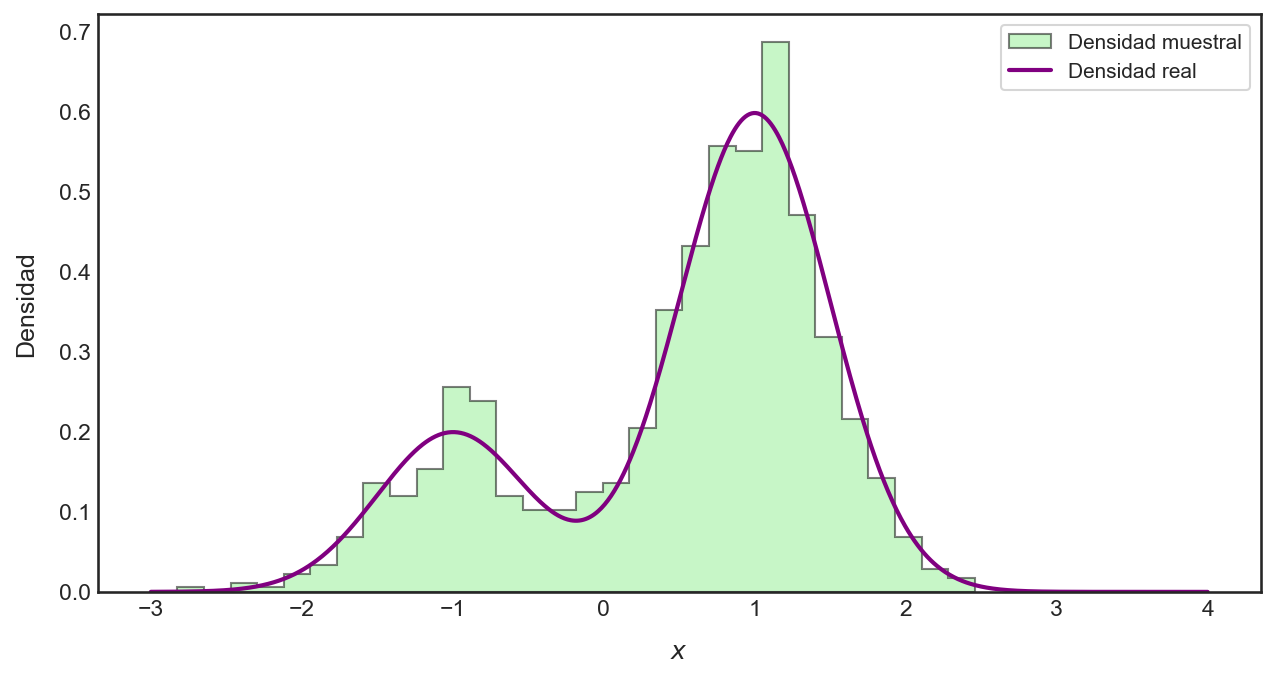

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(
    sample, density=True, histtype="stepfilled", color="lightgreen", 
    alpha=0.5, ec="black", bins=30, label="Densidad muestral"
)
ax.plot(x, X_pdf, color="purple", lw=2, label="Densidad real")
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel("Densidad", fontsize=12, labelpad=10)
ax.legend(loc="best", fontsize=10, frameon=True);

Si bien el módulo `scipy.stats` nos provee de funciones que nos permiten construir estimaciones de tipo KDE, existen algunas implementaciones más flexibles que provienen de otras librerías. En este ejemplo, haremos uso de algunas herramientas provistas por la librería **Scikit-Learn**, la cual es la librería clásica de Machine Learning de Python, y se especializa en la construcción todo tipo de modelos con base en algoritmos de aprendizaje. Puntualmente, usaremos la clase `KernelDensity()` del submódulo `sklearn.neighbors`:

In [63]:
from sklearn.neighbors import KernelDensity

**Scikit-Learn** tiene una filosofía de uso muy especial y útil por su simplicidad: Todo modelo se instancia sobre objetos que tienen siempre los mismos métodos de ajuste y, de aplicar, predicción. Esto quiere decir que los modelos de **Scikit-Learn** se instancian por medio de una clase (como `KernelDensity()`) y se ajustan siempre por medio del mismo método: `fit()`. Por lo tanto, para nuestro ejemplo, si queremos ajustar un estimador KDE con un ancho de banda dado, primero instanciamos una variable con la clase `KernelDensity()` usando el parámetro `bandwidth` para definir el ancho de banda de nuestra estimación y `kernel` para establecer la función kernel a utilizar, y luego aplicamos el método `fit()` para ajustar nuestro modelo, usando como argumento nuestra muestra de datos:

In [64]:
# Instanciamos nuestro modelo.
kde = KernelDensity(kernel="linear", bandwidth=0.8)

In [65]:
# Ajustamos nuestro modelo.
kde.fit(X=sample.reshape(-1, 1))

KernelDensity(bandwidth=0.8, kernel='linear')

Notemos que los conjuntos de datos que aceptan los modelos de **Scikit-Learn** son siempre arreglos bidimensionales. Para conjuntos univariantes (como es nuestro caso), simplemente requerimos que la geometría del arreglo que representa a dicho conjunto de datos tenga una geometría `shape` igual a `(n, 1)`, donde `n` es el número de observaciones.

Para obtener las estimaciones de la función de densidad resultante usamos el método `score_samples()` sobre nuestra instancia del modelo. Sin embargo, los valores retornados por este método se encuentran en una escala logarítmica (en base $e$), por lo cual es necesario exponenciar dichos valores para obtener las estimaciones en la escala original de nuestras muestras:

In [66]:
# Construimos la estimación de densidad a partir de nuestros datos.
pred_density = np.exp(kde.score_samples(x.reshape(-1, 1)))

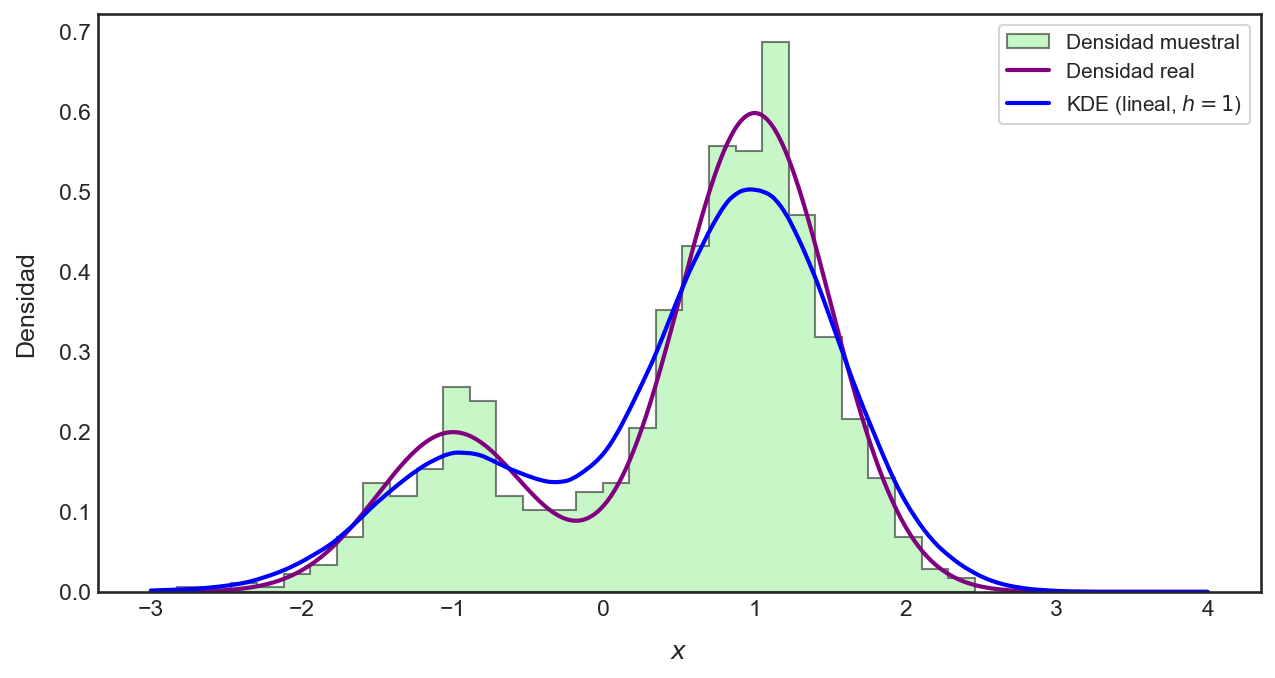

In [67]:
# Graficamos nuestros resultados.
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(
    sample, density=True, histtype="stepfilled", color="lightgreen", 
    alpha=0.5, ec="black", bins=30, label="Densidad muestral"
)
ax.plot(x, X_pdf, color="purple", lw=2, label="Densidad real")
ax.plot(x, pred_density, color="blue", lw=2, label=f"KDE (lineal, $h=1$)")
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel("Densidad", fontsize=12, labelpad=10)
ax.legend(loc="best", fontsize=10, frameon=True);

¡Y ahí lo tenemos! Una estimación bastante razonable para nuestro primer intento. Sin embargo, esto evidente resulta mejorable, debido a que existen muchas funciones de Kernel que podemos implementar, y por supuesto infinitas elecciones para el ancho de banda de la estimación. Es justo preguntarnos entonces... ¿Cuál es la mejor opción?

Resulta que **Scikit-Learn** dispone de herramientas que nos permiten **optimizar los hiperparámetros** de cualquier modelo. Con esto nos referimos a elegir la mejor combinación de ellos, conforme un criterio determinado. Para ello, emplearemos una estrategia de búsqueda que se basa en un concepto clave en la construcción de modelos denominado **validación cruzada** y que funciona como sigue: Dado un conjunto de datos con $n$ observaciones, generamos una división del mismo en $k$ subconjuntos. Luego usamos $k-1$ de estos subconjuntos para ajustar un modelo (cualquiera sea éste), y dejamos el conjunto restante para **validar** que la estimación construida efectivamente generalice correctamente el aprendizaje efectuado a partir del *entrenamiento* en los $k-1$ subconjuntos anteriores. A continuación repetimos el proceso anterior, escogiendo nuevamente $k-1$ subconjuntos con los cuales entrenaremos nuestro modelo, pero esta vez incluyendo el subconjunto que utilizamos en primera instancia para realizar la correspondiente validación, y dejando esta vez un nuevo subconjunto para validar los resultados del modelo en esta nueva etapa. Este proceso lo repetimos $k$ veces hasta que todos los subconjuntos han sido utilizados para validar los modelos entrenados, rankeándolos conforme alguna métrica de rendimiento y quedándonos con el mejor de ellos. Este procedimiento se conoce formalmente como **validación cruzada con $k$ subconjuntos**, con una estrategia de tipo *leave-one-out*.

Dicho lo anterior, la optimización de hiperparámetros en **Scikit-Learn** suele realizarse por medio de una **búsqueda sistemática**, definiendo previamente el conjunto de todos los valores posibles de hiperparámetros donde realizaremos dicha búsqueda, y donde dicho conjunto se conoce como **espacio o dominio de hiperparámetros**. **Scikit-Learn** nos provee de dos opciones de búsqueda: Una en la cual la búsqueda se realiza seleccionando al azar un número determinado de valores del espacio de hiperparámetros, probando los modelos para todas las combinaciones seleccionadas, y que se denomina **estrategia de búsqueda aleatoria**; y otra que, dado un dominio discreto de hiperparámetros, realizada la búsqueda para todas las combinaciones posibles en este espacio, y que se denomina **estrategia de búsqueda por grillas**. Ambas búsquedas implementan la estrategia de validación cruzada comentada previamente.

<p style="text-align: center;"><img src="figures/fig_1_1.gif" width="500"></p>
<p style="text-align: center;">Fig. (1.1): Un ejemplo de validación cruzada de tipo "leave-one-out", con 8 subconjuntos</p>

En **Scikit-Learn**, es posible implementar las estrategias anteriores utilizando las clases `RandomizedSearchCV()` y `GridSearchCV()`, las cuales son provistas por el módulo `sklearn.model_selection`. Cualquiera sea nuestra opción, debemos definir una grilla que defina el espacio de todos los hiperparámetros. En el caso de la clase `KernelDensity()`, si queremos buscar la mejor combinación entre los hiperparámetros `kernel` y `bandwidth`, debemos construir tal grilla por medio de un diccionario de Python como sigue:

In [68]:
# Definimos la grilla (espacio) de hiperparámetros.
params_grid = {
    "kernel": ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"],
    "bandwidth": np.linspace(start=0.001, stop=5, num=1000)
}

In [69]:
# Importamos la clase a utilizar para nuestra búsqueda de hiperparámetros.
from sklearn.model_selection import RandomizedSearchCV

In [70]:
# Instanciamos un modelo de tipo KDE (esta vez, sin predefinir ningún hiperparámetro).
kde_model = KernelDensity()

In [71]:
# Definimos la estrategia de búsqueda (en este caso, de tipo aleatorizada).
regularizer = RandomizedSearchCV(
    random_state=42,
    estimator=kde_model,
    param_distributions=params_grid,
    n_jobs=-1,
    cv=10
)

En la instancia anterior, los argumentos `n_jobs` y `cv` representan el número de procesadores (núcleos) de nuestro computador que serán utilizados para los cálculos involucrados en la optimización de hiperparámetros (un valor `-1` implica el uso de todos los procesadores), y el número de subconjuntos de validación a utilizar en el proceso de validación cruzada.

El objeto `regularizer`, que contiene todos los parámetros de búsqueda definidos previamente, se ajusta de la misma forma que cualquier modelo, haciendo uso del método `fit()`:

In [72]:
# Realizamos la búsqueda de hiperparámetros.
regularizer.fit(sample.reshape(-1, 1))

/Users/felipequezada/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [-135.74084363 -190.27628419 -244.42523332 -215.89808494 -162.22041823
 -160.97890615 -184.4566187           -inf -246.26492002 -169.23296392]
  warnings.warn(
/Users/felipequezada/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


RandomizedSearchCV(cv=10, estimator=KernelDensity(), n_jobs=-1,
                   param_distributions={'bandwidth': array([1.00000000e-03, 6.00400400e-03, 1.10080080e-02, 1.60120120e-02,
       2.10160160e-02, 2.60200200e-02, 3.10240240e-02, 3.60280280e-02,
       4.10320320e-02, 4.60360360e-02, 5.10400400e-02, 5.60440440e-02,
       6.10480480e-02, 6.60520521e-02, 7.10560561e-02, 7.60600601e-02,
       8.1064064...
       4.90492392e+00, 4.90992793e+00, 4.91493193e+00, 4.91993594e+00,
       4.92493994e+00, 4.92994394e+00, 4.93494795e+00, 4.93995195e+00,
       4.94495596e+00, 4.94995996e+00, 4.95496396e+00, 4.95996797e+00,
       4.96497197e+00, 4.96997598e+00, 4.97497998e+00, 4.97998398e+00,
       4.98498799e+00, 4.98999199e+00, 4.99499600e+00, 5.00000000e+00]),
                                        'kernel': ['gaussian', 'tophat',
                                                   'epanechnikov',
                                                   'exponential', 'linear',
      

Para obtener la mejor estimación encontrada por nuestro proceso de búsqueda de hiperparámetros, consultamos el atributo `best_estimator_` de nuestra instancia anterior, y lo asignamos a una nueva variable:

In [73]:
# Obtenemos el mejor modelo.
kde_best = regularizer.best_estimator_
kde_best

KernelDensity(bandwidth=0.7165725725725726, kernel='epanechnikov')

Vemos pues que el mejor modelo es un estimador KDE con kernel lineal y un ancho de banda aproximadamente igual a 0.591472. Obtengamos los valores estimados por este modelo para la función de densidad:

In [74]:
# Construimos la estimación de densidad a partir de nuestros datos.
pred_density_best = np.exp(kde_best.score_samples(x.reshape(-1, 1)))

Y grafiquemos nuestros resultados:

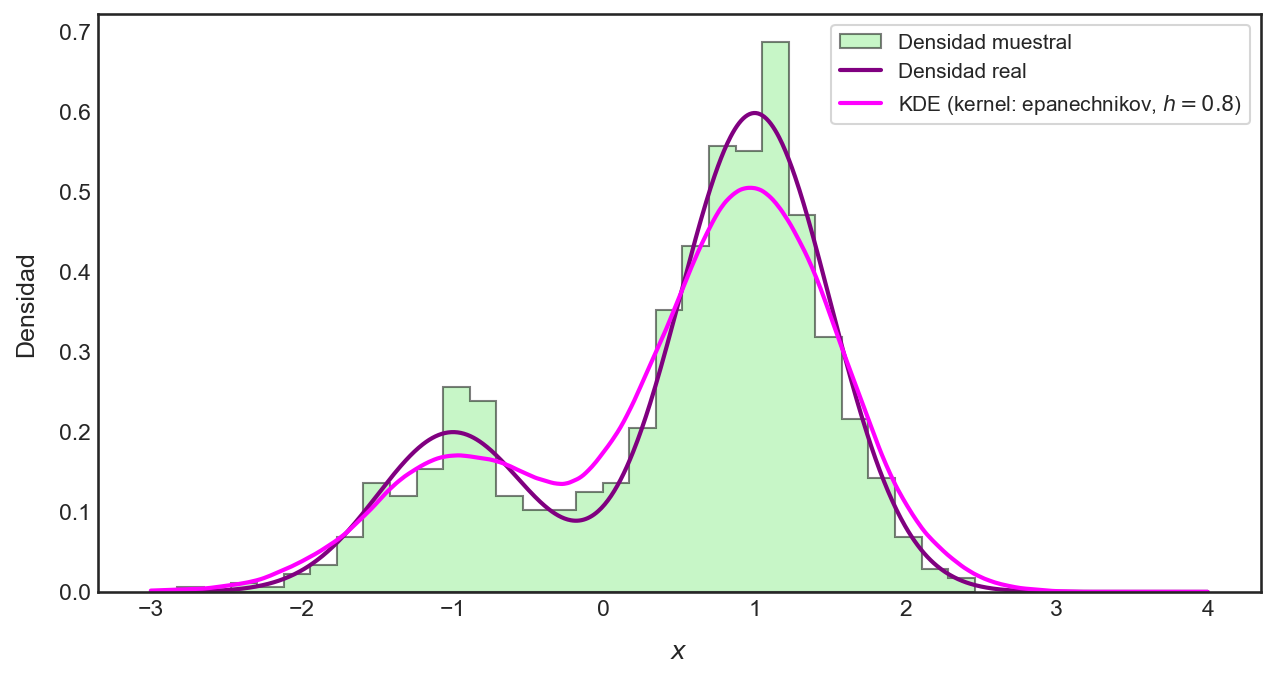

In [75]:
# Graficamos nuestros resultados.
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(
    sample, density=True, histtype="stepfilled", color="lightgreen", 
    alpha=0.5, ec="black", bins=30, label="Densidad muestral"
)
ax.plot(x, X_pdf, color="purple", lw=2, label="Densidad real")
#ax.plot(x, pred_density, color="blue", lw=2, label=f"KDE (lineal, $h=1$)")
ax.plot(x, pred_density_best, color="magenta", lw=2, label=f"KDE (kernel: {kde_best.kernel}, $h={kde.bandwidth}$)")
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel("Densidad", fontsize=12, labelpad=10)
ax.legend(loc="best", fontsize=10, frameon=True);

¡Y ahí ya tenemos una estimación de mucha mejor calidad!

Puede parecer que el trabajo anterior es sorprendente. Y de hecho, es posible que lo sea, ya que nos hemos ahorrado cálculos de alta complejidad por medio del uso de las herramientas que hemos aprendido. Sin embargo, incluso a este nivel, existen librerías con mejor potencial para la optimización de hiperparámetros. Un ejemplo es **Optuna** (https://optuna.org) ◼

**Ejemplo 1.4 - KDE para un caso multivariante:** Vamos a extender el **Ejemplo 1.3** para el caso de la estimación de una función de densidad bidimensional; es decir, una función de densidad generada por la combinación de dos variables aleatorias que tienen sus propias funciones de densidad (que denominamos como **marginales**). 

Para ello, usaremos algo de data relativa a las estimaciones de algunas propiedades del mineral que alimenta una planta concentradora, haciendo uso del archivo `datasets/feeding_ore.csv`. Puntualmente, es conocido el hecho de que existe una codependencia parcial entre la ley de alimentación a una planta y la recuperación estimada, a partir de un modelo geometalúrgico, para dicho mineral. Intentaremos estimar la función de densidad conjunta considerando que ambas variables son muestras de ciertas variables aleatorias. A diferencia del ejemplo anterior, las funciones de densidad tanto marginales como conjunta serán desconocidas, lo que es ciertamente algo muy común en un problema de este tipo.

Partimos pues accediendo a nuestros datos:

In [76]:
# Accedemos al archivo con los datos.
data = pd.read_csv("datasets/feeding_ore.csv", sep=";")

In [77]:
# Revisamos este DataFrame.
data.head()

,Fecha,Ley Cu,Ley Fe,Ley CuS,Razon Solubilidad,Recuperacion,Contenido Arcillas,Dureza Mineral
0,01-01-17,0.551644,0.91,0.040491,7.340001,83.624430,Media,Baja
1,02-01-17,0.627278,0.87,0.039976,6.372893,83.977976,Media,Baja
2,03-01-17,0.516193,0.91,0.056540,10.953222,84.596316,Media,Baja
3,04-01-17,0.526619,0.85,0.055908,10.616376,86.941750,Media,Media
4,05-01-17,0.522008,1.00,0.049271,9.438724,86.063811,Alta,Media


Estamos interesados en todas aquellas observaciones tales que la ley de cobre de alimentación es distinta de cero, y donde la recuperación es mayor que un 70%. Por lo tanto, efectuamos dicho filtro:

In [78]:
# Consideramos únicamente la data para la cual la recuperación es mayor que un 70%.
data = data[(data["Recuperacion"] > 70) & (data["Ley Cu"] > 0.0)]

In [79]:
# Extraemos la información de interés.
X1_samp = data["Ley Cu"].copy()
X2_samp = data["Recuperacion"].copy()

In [80]:
# Generamos una imputación de valores de tipo nan.
X1_samp.dropna(inplace=True)
X2_samp.dropna(inplace=True)

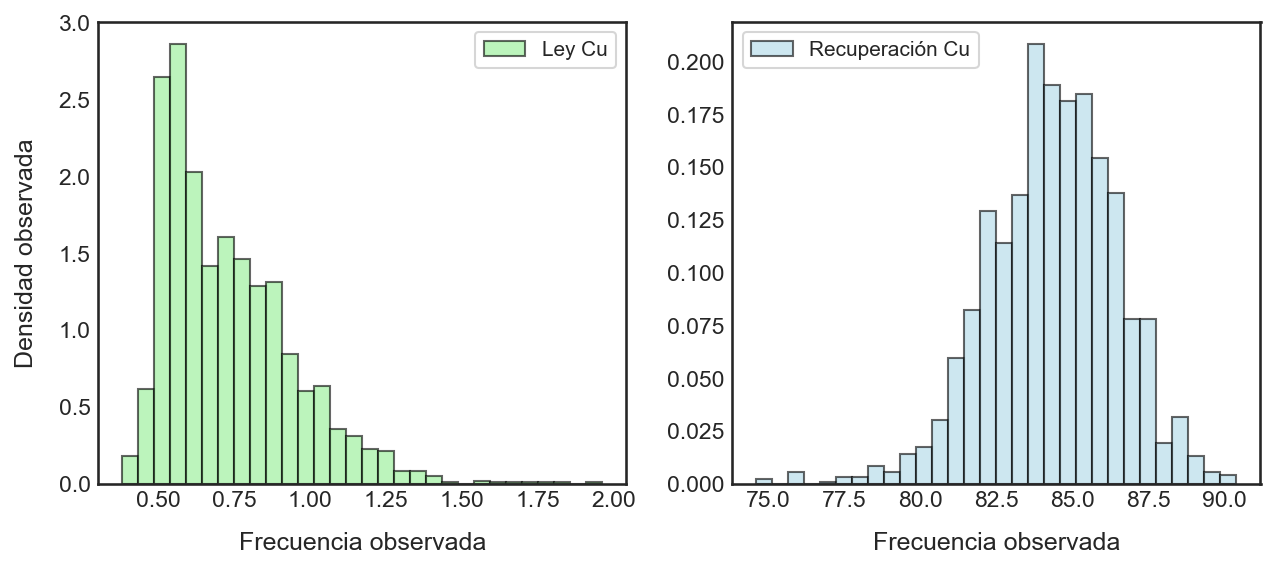

In [81]:
# Graficamos las densidades marginales.
fig, ax = plt.subplots(figsize=(10, 4), ncols=2)
ax[0].hist(
    X1_samp, bins=30, color="lightgreen", density=True,
    alpha=0.6, ec="black", label="Ley Cu"
)
ax[1].hist(
    X2_samp, bins=30, color="lightblue", density=True,
    alpha=0.6, ec="black", label="Recuperación Cu"
)
ax[0].legend(fontsize=10, frameon=True)
ax[1].legend(fontsize=10, frameon=True)
ax[0].set_ylabel("Densidad observada", fontsize=12, labelpad=10)
ax[0].set_xlabel("Frecuencia observada", fontsize=12, labelpad=10)
ax[1].set_xlabel("Frecuencia observada", fontsize=12, labelpad=10);

Siempre es buena idea, previo a construir una estimación de tipo KDE para una función de densidads bidimensional, visualizar nuestra data conforme un gráfico de dispersión, a fin de tener una idea general de cómo debe ser dicha estimación:

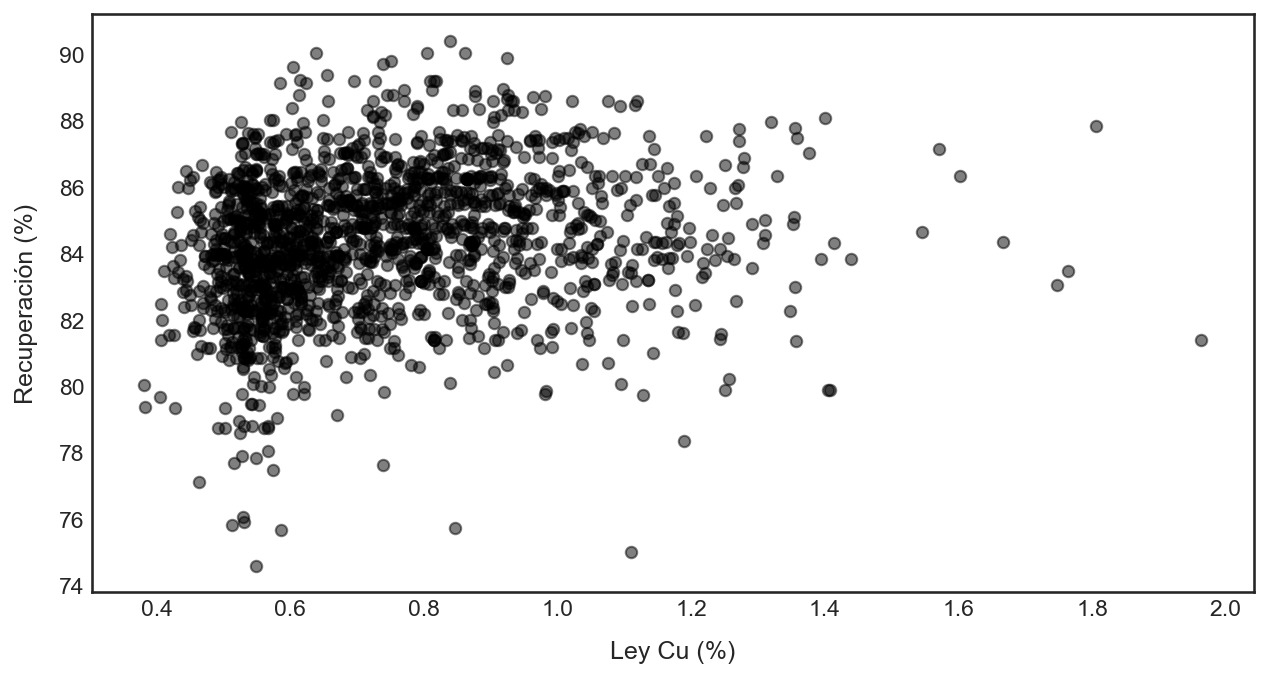

In [82]:
# Y graficamos la dispersión entre estas variables.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=X1_samp, y=X2_samp, s=30, color="black", alpha=0.5)
ax.set_xlabel("Ley Cu (%)", fontsize=12, labelpad=10)
ax.set_ylabel("Recuperación (%)", fontsize=12, labelpad=10);

En esta oportunidad, haremos uso de la clase `LeaveOneOut()` de **Scikit-Learn** para explicitar nuestra estrategia de validación cruzada. Además, es preciso notar que los procesos de ajuste realizados por modelos instanciados a partir de objetos de **Scikit-Learn** requieren tener una geometría de `m` filas por `n` columnas, donde `m` hace referencia al número de observaciones que constituyen nuestra data, y `n` al número de variables que la caracterizan. Por esta razón, el input del método `fit()` será la concatenación por columnas de cada variable (ley y recuperación):

In [83]:
# Vamos a explicitar la estrategia de validación cruzada de tipo leave-one-out.
from sklearn.model_selection import LeaveOneOut

In [84]:
# Definimos la grilla (espacio) de hiperparámetros.
params_grid = {
    "kernel": ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"],
    "bandwidth": np.linspace(start=0.001, stop=5, num=100)
}

In [85]:
# Instanciamos un modelo de tipo KDE.
kde_model = KernelDensity()

In [86]:
# Definimos la estrategia de búsqueda (en este caso, de tipo aleatorizada).
regularizer = RandomizedSearchCV(
    random_state=42,
    estimator=kde_model,
    param_distributions=params_grid,
    n_jobs=-1,
    cv=LeaveOneOut()
)

In [87]:
# Procedemos al entrenamiento de nuestro modelo.
regularizer.fit(pd.concat([X1_samp, X2_samp], axis=1).values)

/Users/felipequezada/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [-2.3900264  -4.60503008 -4.39959523        -inf -3.05240437 -3.2223905
        -inf -4.12678154 -2.75060223 -3.75014515]
  warnings.warn(
/Users/felipequezada/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


RandomizedSearchCV(cv=LeaveOneOut(), estimator=KernelDensity(), n_jobs=-1,
                   param_distributions={'bandwidth': array([1.00000000e-03, 5.14949495e-02, 1.01989899e-01, 1.52484848e-01,
       2.02979798e-01, 2.53474747e-01, 3.03969697e-01, 3.54464646e-01,
       4.04959596e-01, 4.55454545e-01, 5.05949495e-01, 5.56444444e-01,
       6.06939394e-01, 6.57434343e-01, 7.07929293e-01, 7.58424242e-0...
       4.04059596e+00, 4.09109091e+00, 4.14158586e+00, 4.19208081e+00,
       4.24257576e+00, 4.29307071e+00, 4.34356566e+00, 4.39406061e+00,
       4.44455556e+00, 4.49505051e+00, 4.54554545e+00, 4.59604040e+00,
       4.64653535e+00, 4.69703030e+00, 4.74752525e+00, 4.79802020e+00,
       4.84851515e+00, 4.89901010e+00, 4.94950505e+00, 5.00000000e+00]),
                                        'kernel': ['gaussian', 'tophat',
                                                   'epanechnikov',
                                                   'exponential', 'linear',
              

In [88]:
# Nos quedamos con el mejor modelo.
kde_best = regularizer.best_estimator_

In [89]:
# Verificamos el ancho de banda seleccionado a partir de nuestra estrategia de búsqueda.
kde_best

KernelDensity(bandwidth=0.9099090909090908, kernel='epanechnikov')

Ya hemos ajustado nuestro modelo. Ahora graficaremos los resultados obtenidos mediante este estimador. Para este caso, definiremos una grilla para construir tal visualización, limitada por los valores máximos y mínimos de cada una de las dos variables involucradas:

In [90]:
# Creamos una grilla con frontera en los valores máximos y mínimos de nuestra muestra para
# graficar la función de densidad estimada.
x1 = np.linspace(start=X1_samp.min(), stop=X1_samp.max(), num=200)
x2 = np.linspace(start=X2_samp.min(), stop=X2_samp.max(), num=200)

u1, u2 = np.meshgrid(x1, x2)
grid = np.column_stack([u1.ravel(), u2.ravel()])

In [91]:
# Estimación de la función de densidad conjunta.
kde_pred = np.exp(kde_best.score_samples(grid))

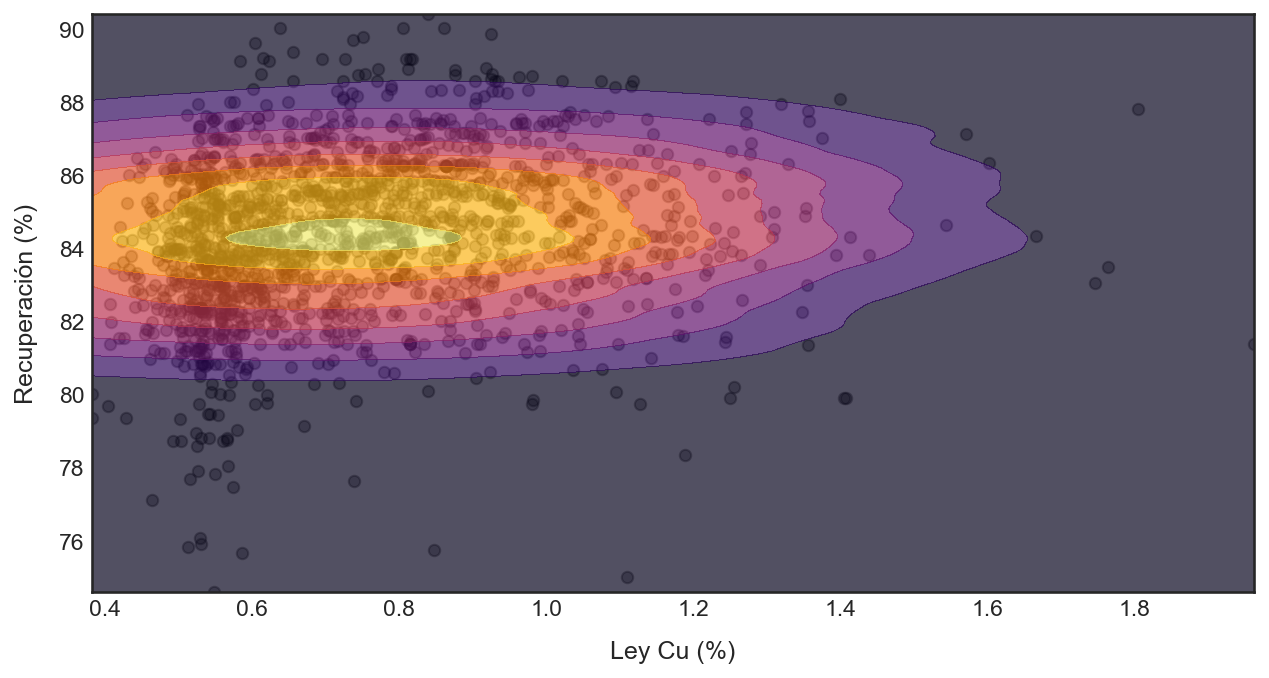

In [92]:
# Graficamos la densidad estimada.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=X1_samp, y=X2_samp, s=30, color="black", alpha=0.3)
ax.contourf(u1, u2, kde_pred.reshape(u1.shape), levels=10, alpha=0.7, cmap="inferno")
ax.set_xlabel("Ley Cu (%)", fontsize=12, labelpad=10)
ax.set_ylabel("Recuperación (%)", fontsize=12, labelpad=10);

¡Nada mal! Con la información anterior, podemos incluso construir una visualización tridimensional de esta función de densidad estimada:

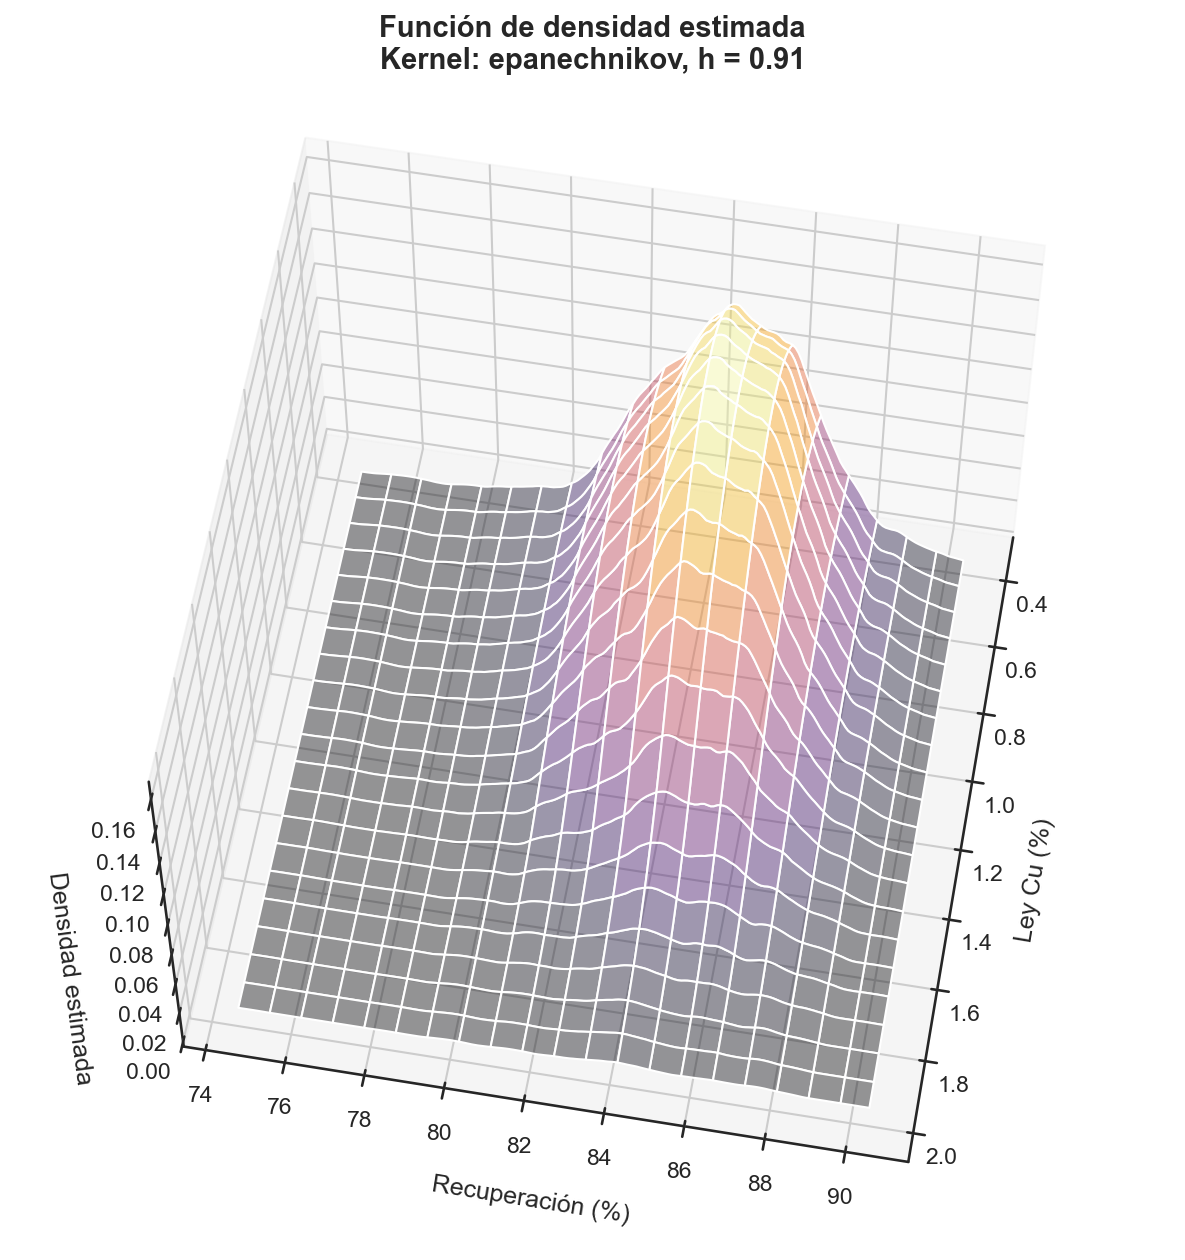

In [93]:
# Representación tridimensional de la función de densidad conjunta.
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection="3d")
ax.plot_surface(u1, u2, kde_pred.reshape(u1.shape), rstride=10, alpha=0.4, cmap="inferno")
ax.set_xlabel("Ley Cu (%)", fontsize=12, labelpad=10)
ax.set_ylabel("Recuperación (%)", fontsize=12, labelpad=10)
ax.set_zlabel("Densidad estimada", fontsize=12, labelpad=10)
ax.set_title(
    "Función de densidad estimada\n" + f"Kernel: {kde_best.kernel}, h = {round(kde_best.bandwidth, 2)}",
    fontsize=14, fontweight="bold", pad=10
)
ax.view_init(60, 10);

◼
### Bondad de ajuste.
En el **Ejemplo 1.4**, estimamos la función de densidad conjunta relativa a dos variables que suponíamos que eran realizaciones de un par de variables aleatorias cuya distribución es desconocida. Este es el escenario en prácticamente la gran mayoría de problemas que guardan estrecha relación con datos y, por lo tanto, es importante contar con alguna herramienta que nos permita ajustar una distribución teórica a una distribución observada, obteniendo como resultado alguna métrica que nos indique si efectivamente hay un ajuste de buena calidad. Un procedimiento de este tipo, que describe lo bien que se ajusta un conjunto de observaciones a un función de distribución teórica, se conoce como **bondad de ajuste**.

**Estimación de máxima verosimilitud.**

El módulo `scipy.stats` dispone de un método de ajuste de distribuciones de probabilidad basado en un procedimiento bien conocido en matemáticas y denominado **estimación de máxima verosimilitud** (MLE, del inglés *maximum likelihood estimation*). Dicho método permite estimar los parámetros de una distribución de probabilidad asumida que, suponemos, describe nuestra data.

Para entender este concepto, es bueno partir definiendo lo que es un estimador propiamente tal. Consideremos pues un conjunto de $n$ variables aleatorias $X_{1},...,X_{n}$ cuyas realizaciones (observaciones) son $x_{1},...,x_{n}$, respectivamente. Asumiremos que estas variables aleatorias tienen una determinada distribución conjunta de probabilidad, la cual queda completamente determinada por un conjunto de parámetros que se agrupan en el vector $\mathbf{\theta}=(\theta_{1},...,\theta_{k})\in \mathbb{R}^{k}$. Diremos que los valores posibles que pueden tomar dichos parámetros conforman un espacio o dominio, denotado como $\Omega$, y que llamamos **espacio de parámetros**.

Cualquier función de $X_{1},...,X_{n}$, digamos $u(X_{1},...,X_{n})$, que permita *estimar* $\mathbf{\theta}$ es llamada, valga la redundancia, **estimador puntual** de $\mathbf{\theta}$. De esta manera, si evaluamos la función $u$ sobre los correspondientes datos observados $x_{1},...,x_{n}$, obtendremos una **estimación puntual** de $\mathbf{\theta}$.

Supongamos pues que nuestro objetivo es encontrar un estimador puntual $u(X_{1},...,X_{n})$ tal que $u(x_{1},...,x_{n})$ es una *buena* estimación puntual $\mathbf{\theta}$. Por ejemplo, si planeamos extraer una muestra aleatoria $X_{1},...,X_{n}$ que es tal que sabemos que $X_{i}$ tiene una distribución normal con media $\mu_{i}$ y varianza $\sigma_{i}^{2}$ para todo $i=1,...,n$, entonces debemos encontrar una *buena* estimación de dichos parámetros usando para ello la data observada $x_{1},...,x_{n}$.

Parece razonable suponer que una *buena* estimación del parámetro desconocido $\mathbf{\theta}$ sea una tal que el valor de $\mathbf{\theta}$ maximice la probabilidad de obtener la data observada, donde dicha probabilidad es llamada **verosimilitud**. De esta manera, si denotamos las funciones de densidad marginales para cada $X_{i}$ ($1\leq i\leq n$) como $f(x_{i}|\mathbf{\theta})$, entonces la función de densidad conjunta de $X_{1},...,X_{n}$, que denotaremos como $L(\mathbf{\theta})$, puede escribirse como

$$L(\mathbf{\theta})=P(X_{1}=x_{1},...,X_{n}=x_{n})=f(x_{1}|\mathbf{\theta})\cdots f(x_{n}|\mathbf{\theta})=\displaystyle \prod^{n}_{j=1} f(x_{j}|\mathbf{\theta})$$
</p> <p style="text-align: right;">$(1.10)$</p>

El lado izquierdo de la Ec. (1.10) es, por supuesto, la definición de la función de densidad conjunta de probabilidad para $\mathbf{X}=(X_{1},...,X_{n})$. El lado derecho resulta del hecho de que disponemos de una muestra aleatoria de datos, lo que implica por definición que las variables aleatorias $X_{1},...,X_{n}$ son independientes.

Si la estimación de $\mathbf{\theta}$ es *buena* cuando la probabilidad (verosimilitud) de obtener la data observada como resultado de usar la correspondiente estimación $\mathbf{\hat \theta}$ sobre la función de densidad que hemos supuesto como descriptora del vector aleatorio $\mathbf{X}$, es claro que la estimación de maxima verosimilitud es equivalente a un problema de optimización donde el valor de $\mathbf{\hat \theta}$ viene dado por

$$\mathbf{\hat \theta}=\underset{\theta\in\Omega}{\operatorname{arg\;max}}(L(\mathbf{\theta}))$$
</p> <p style="text-align: right;">$(1.11)$</p>

El valor específico $\mathbf{\hat \theta}=\mathbf{\hat \theta}_{n}(\mathbf{x})\in \Omega$, donde $\mathbf{x}=(x_{1},...,x_{n})\in \mathbb{R}^{n}$, que maximiza la **función de verosimilitud** $L(\mathbf{\theta})$ es llamado **estimación de máxima verosimilitud** para $\mathbf{\theta}$. Si la función $\hat{\mathbf{\theta}}_{n} :\mathbb{R}^{n} \longrightarrow \Omega$ así definida es una función de conjunto con aditividad finita (es decir, $\hat{\mathbf{\theta } }_{n} \left( A\cup B\right)  =\hat{\mathbf{\theta } }_{n} \left( A\right)  +\hat{\mathbf{\theta } }_{n} \left( B\right)  $ para todo par de conjuntos disjuntos $A$ y $B$), entonces $\hat{\mathbf{\theta } }_{n}$ se denominará estimador de máxima verosimilitud de $\mathbf{\theta}$.

En la práctica, resulta conveniente trabajar con el logaritmo de la función de verosimilitud, y que se denota como $LL(\mathbf{\theta})$:

$$LL(\mathbf{\theta})=\displaystyle \log \left( \displaystyle \prod^{n}_{j=1} f(x_{j}|\mathbf{\theta } )\right)  =\sum^{n}_{j=1} \log \left( f\left( x_{j}|\mathbf{\theta } \right)  \right)$$
</p> <p style="text-align: right;">$(1.12)$</p>

Debido a que el logaritmo es una función monótona, el máximo de $LL(\mathbf{\theta})$ ocurre en el mismo valor de $\mathbf{\theta}$ para el caso de $L(\mathbf{\theta})$. Si $LL(\mathbf{\theta})$ es una función diferenciable en $\mathbf{\theta}=(\theta_{1}, ..., \theta_{k})$, entonces sabemos que las condiciones necesarias para la ocurrencia de un máximo (o mínimo) pueden resumirse en el cumplimiento de las $k$ ecuaciones de verosimilitud

$$\begin{array}{llll}&\displaystyle \frac{\partial }{\partial \theta_{i} } \left( LL\left( \theta_{i} \right)  \right)  &=&0\\ \Longrightarrow &\displaystyle \frac{\partial }{\partial \theta_{i} } \left(\displaystyle  \sum^{n}_{j=1} \log \left( f\left( x_{j}|\theta_{i} \right)  \right)  \right)  &=&0\\ \Longrightarrow &\displaystyle \sum^{n}_{j=1} \left(\displaystyle  \frac{1}{f\left( x_{j}|\theta_{i} \right)  }\displaystyle  \frac{\partial f}{\partial \theta_{i} } \right)  &=&0\end{array}$$
</p> <p style="text-align: right;">$(1.13)$</p>

Para algunas funciones de densidad, las ecuaciones anteriores tienen una solución algebraicamente cerrada. Sin embargo, en general, es recomendable el uso de métodos numéricos de optimización para encontrar las soluciones de (1.13).

El preámbulo matemático anterior ya es suficiente para entender, en líneas generales, el significado de una prueba de bondad del ajuste basada en una estimación de máxima verosimilitud. En el caso del módulo `scipy.stats`, existe un listado de decenas de distribuciones respecto de las cuales podemos generar ajustes, y que podemos consultar en la correspondiente [documentación](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions) oficial de **Scipy**.

Es importante considerar que, previo a construir cualquier ajuste, será necesario conocer el dominio de la función de densidad inherente a la variable aleatoria que queremos ajustar. En general, un supuesto de este tipo siempre puede hacerse de forma razonable. Por ejemplo, si $X$ es una variable aleatoria que representa el consumo de combustible de un camión de extracción (CAEX), es claro que dicha variable tiene como rango el conjunto $\mathbb{R}^{+}$. Este puede ser un supuesto grosero, ya que el consumo de combustibke de un CAEX no puede ser infinitamente grande, pero servirá como punto de partida.

**Comparación de ajustes mediante el criterio de información de Akaike.**

La estimación de máxima verosimilitud permite, valga la redundancia, estimar los parámetros que mejor se ajustan a una determinada función de densidad en comparación a un conjunto de valores observados. Sin embargo, dicho método no nos informa de la calidad del ajuste de manera sistemática. Si construimos $r$ ajustes, el método de máxima verosimilitud no tiene forma de determinar cuál de esos $r$ ajustes es el mejor. Para ello, necesitamos herramientas adicionales.

Una de estas herramientas es el **criterio de información de Akaike (AIC)**, y que corresponde a un estimador del error de predicción y, por extensión, la calidad relativa de un modelo estadístico con respecto a un conjunto de datos dado. Dada una colección de modelos, el criterio de información de Akaike estima la calidad de cada uno, en relación al resto, y nos permite por tanto seleccionar el mejor de ellos.

El AIC tiene sus fundamentos en la teoría de la información